# Fidelity analysis

## BOX diagram IDEAL
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

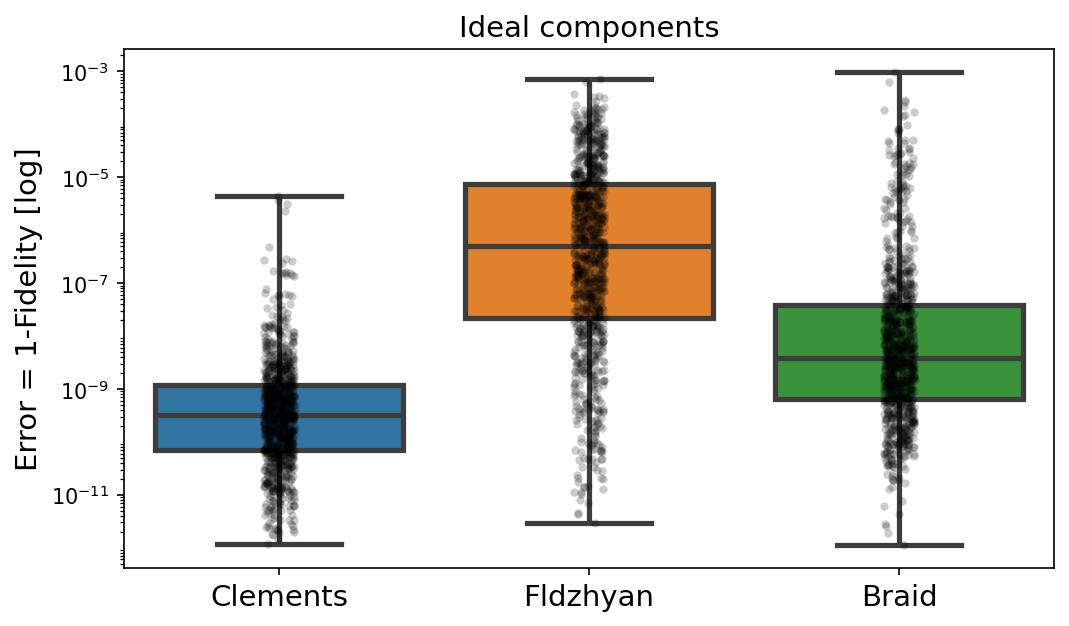

In [21]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
min_arct = []
q25_arct = []
q50_arct = []
q75_arct = []
max_arct = []
fidelities_box = []
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q0 = [np.percentile(fid, 0) for fid in fidelities]      # Min
    q25 = [np.percentile(fid, 25) for fid in fidelities]    # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]    # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]    # 3rd Quartile (Q3)
    q100 = [np.percentile(fid, 100) for fid in fidelities]  # Max
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)

    fidelities_box.append([1-fid for fid in fidelities[6]])

data = {
    names_arct[0]: fidelities_box[0],
    names_arct[1]: fidelities_box[1],
    names_arct[2]: fidelities_box[2],
}

# Create DataFrame
df = pd.DataFrame(data)
# Melt DataFrame into long format for easier plotting
df_long = df.melt(var_name='Category', value_name='Value')

# Set up the figure size
plt.figure(figsize=(8, 4.5), dpi=150)
# Create the box plot with a logarithmic y-axis
sns.boxplot(data=df, whis=[0, 100], linewidth=2.5)
# Overlay stripplot with slight jitter and alpha for controlled overlapping
sns.stripplot(data=df, jitter=0.05, color='black', size=4, alpha=0.2)  # Adds controlled overlap

from matplotlib.ticker import LogLocator, LogFormatter

ax = plt.gca()
# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Enable minor ticks only on the y-axis
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2.0, 10.0) * 0.1, numticks=10))

# # Optionally format the labels on the logarithmic axis
# ax.yaxis.set_major_formatter(LogFormatter())

# # Turn off minor ticks on the x-axis if not needed
# ax.xaxis.set_minor_locator(plt.NullLocator())

plt.ylabel('Error = 1-Fidelity [log]', fontsize=14)
plt.title('Ideal components', fontsize=14)
plt.xticks(fontsize=14)

# Show the plot
plt.show()

## BOX diagram IDEAL
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB \

EPOCHS=60,000

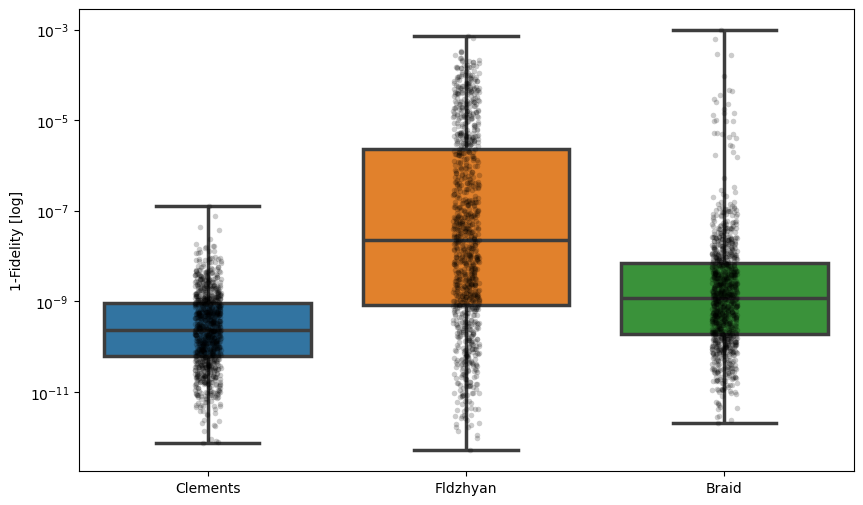

In [20]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

JSON_folder_name = 'organized_data/20240902_run_11_IDEAL/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
min_arct = []
q25_arct = []
q50_arct = []
q75_arct = []
max_arct = []
fidelities_box = []
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q0 = [np.percentile(fid, 0) for fid in fidelities]      # Min
    q25 = [np.percentile(fid, 25) for fid in fidelities]    # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]    # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]    # 3rd Quartile (Q3)
    q100 = [np.percentile(fid, 100) for fid in fidelities]  # Max
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)

    fidelities_box.append([1-fid for fid in fidelities[0]])

data = {
    names_arct[0]: fidelities_box[0],
    names_arct[1]: fidelities_box[1],
    names_arct[2]: fidelities_box[2],
}

# Create DataFrame
df = pd.DataFrame(data)
# Melt DataFrame into long format for easier plotting
df_long = df.melt(var_name='Category', value_name='Value')

# Set up the figure size
plt.figure(figsize=(10, 6), dpi=150)
# Create the box plot with a logarithmic y-axis
sns.boxplot(data=df, whis=[0, 100], linewidth=2.5)
# Overlay stripplot with slight jitter and alpha for controlled overlapping
sns.stripplot(data=df, jitter=0.05, color='black', size=4, alpha=0.2)  # Adds controlled overlap

plt.yscale('log')
plt.ylabel('1-Fidelity [log]')
plt.show()

# Beam splitter

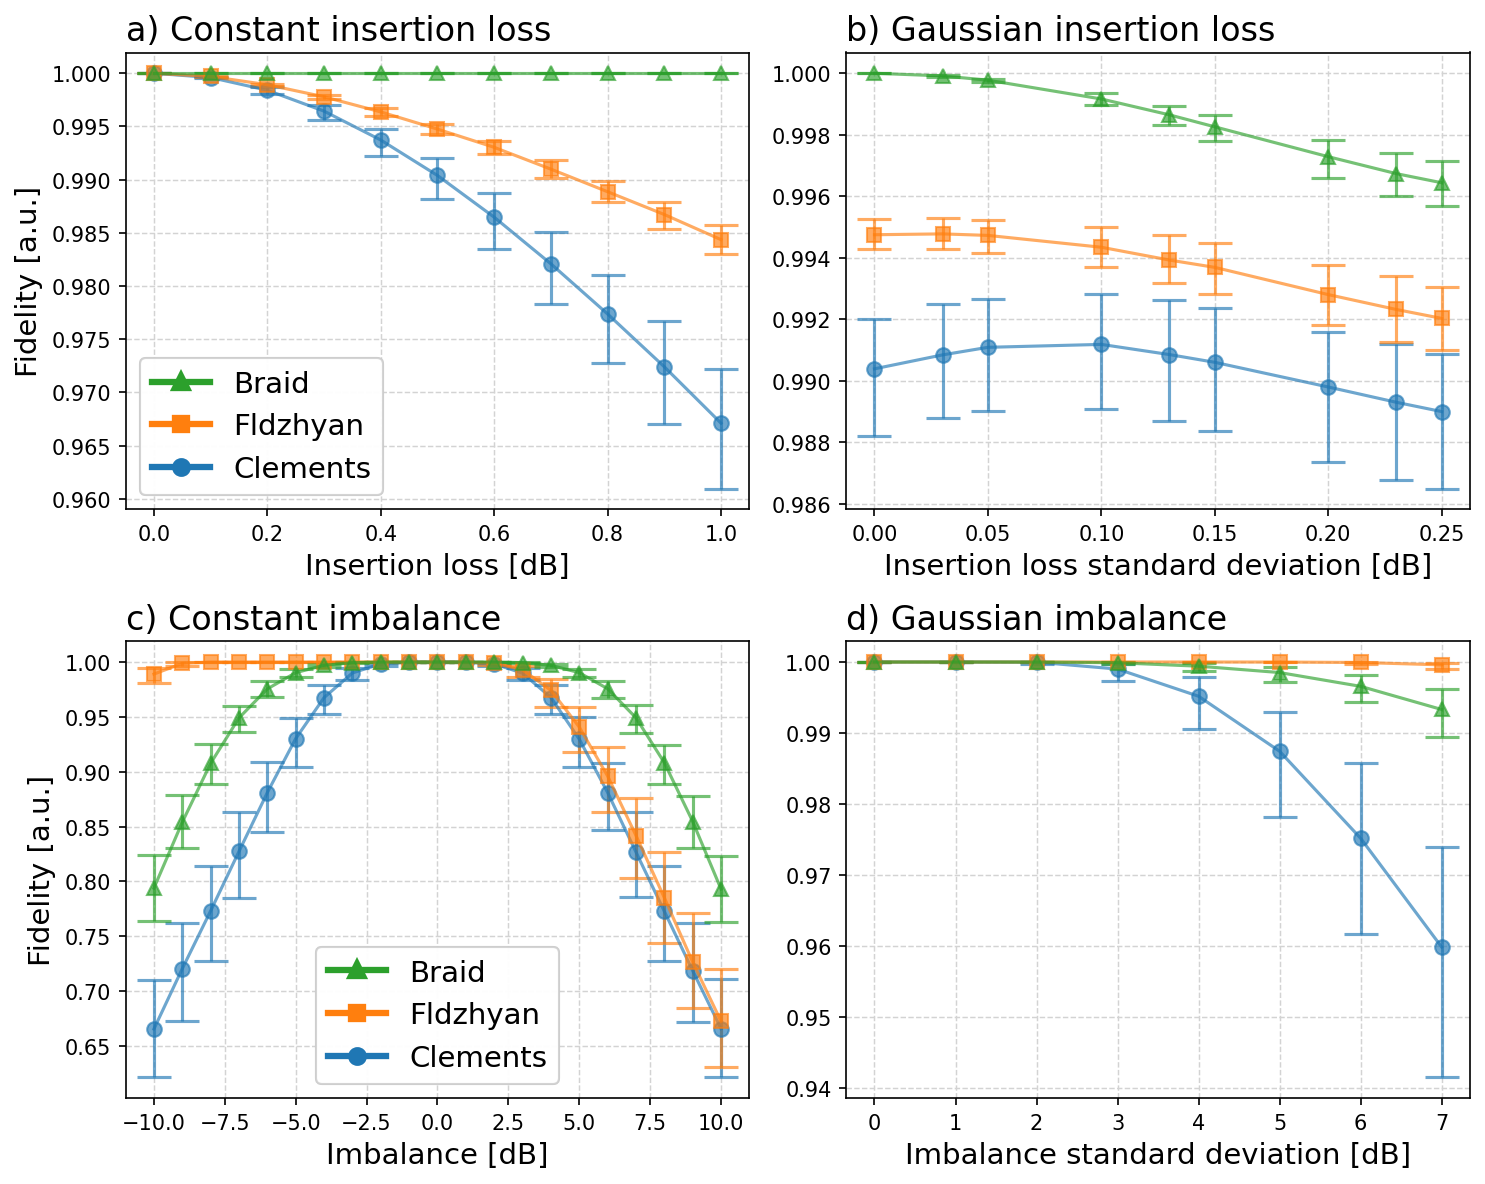

In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

def filter_list_of_dicts(dict_list, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IMB=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    il_BS = [sim["il_mmi_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    il_BS = [-x for x in il_BS]
    axs[0, 0].errorbar(il_BS, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[0, 0].set_title('a) Constant insertion loss', loc='left', fontsize=16)
axs[0, 0].set_xlabel('Insertion loss [dB]', fontsize=14)
axs[0, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[0, 0].add_artist(axs[0, 0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3, lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3, lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3, lw=3, label=names_arct[0])],
    fontsize=14))
axs[0, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_13_gaus_BS/'

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                               ilPhSm=0, ilPhSs=0,
                                               ilMMIm=-0.5, imbMMIm=0, imbMMIs=0,
                                               ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    iloss_MMI_sigma = [sim["iloss_MMI_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[0, 1].errorbar(iloss_MMI_sigma, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[0, 1].set_title('b) Gaussian insertion loss', loc='left', fontsize=16)
axs[0, 1].set_xlabel('Insertion loss standard deviation [dB]', fontsize=14)
# axs[0, 1].set_ylabel('Fidelity [a.u.]')
axs[0, 1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_10_IMB_nonIDEAL/'

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[1, 0].errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[1, 0].set_title('c) Constant imbalance', loc='left', fontsize=16)
axs[1, 0].set_xlabel('Imbalance [dB]', fontsize=14)
axs[1, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[1, 0].add_artist(axs[1, 0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3, lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3, lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3, lw=3, label=names_arct[0])],
    fontsize=14))
axs[1, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_13_gaus_BS/'

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    if i_arct != 1:
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=0, ilPhSs=0,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=0,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    else:
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=0, ilPhSs=0,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=-3.5,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)

    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_sigma = [sim["imbalance_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[1, 1].errorbar(imbalance_sigma, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[1, 1].set_title('d) Gaussian imbalance', loc='left', fontsize=16)
axs[1, 1].set_xlabel('Imbalance standard deviation [dB]', fontsize=14)
# axs[1, 1].set_ylabel('Fidelity [a.u.]')
axs[1, 1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)


# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## BS Sweep IL
IL_MMI=SWEEP \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

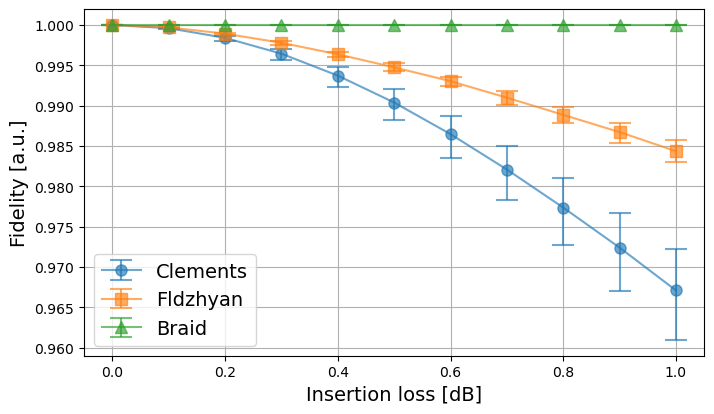

In [24]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5), dpi=150)
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IMB=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    il_BS = [sim["il_mmi_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    il_BS = [-x for x in il_BS]
    plt.errorbar(il_BS, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Insertion loss [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## BS Sweep IL sigma
IL_MMI= 0.5 +- SWEEP \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

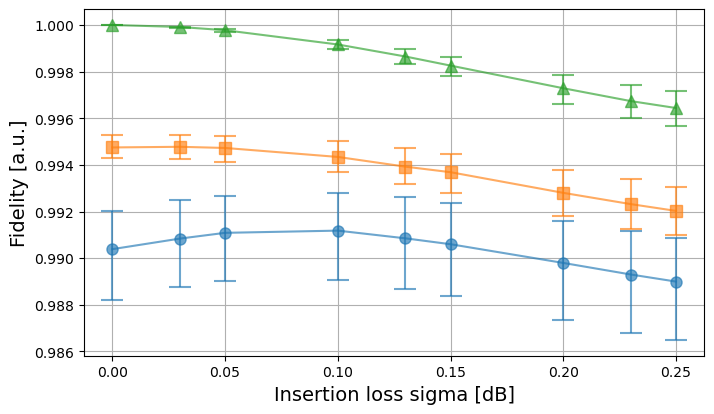

In [23]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_13_gaus_BS/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                               ilPhSm=0, ilPhSs=0,
                                               ilMMIm=-0.5, imbMMIm=0, imbMMIs=0,
                                               ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    iloss_MMI_sigma = [sim["iloss_MMI_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(iloss_MMI_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Insertion loss sigma [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

## BS Sweep IMB
IL_MMI=0dB \
IMB=SWEEP \
IL_CROSS=0dB \
CT=-1000dB

[0.3346481074965416, 0.2796666035978934, 0.2269620143977148, 0.17272587145331952, 0.11903398432756351, 0.06984593537974382, 0.0324619568668254, 0.010000825227250099, 0.001644651309389733, 2.3758419877784043e-05, 3.1765245989134883e-10, 2.364658840914302e-05, 0.001650018402979514, 0.010184388884534323, 0.03236092440925087, 0.07033615814694638, 0.11897067632086489, 0.1732941791320789, 0.22732384459091892, 0.28147398322790507, 0.3343646499844697]
[0.011004970462237806, 0.0012343140950064058, 2.382316599958134e-05, 1.3557348355064391e-07, 1.6236588740170532e-08, 5.8143886372263864e-09, 4.241346274191926e-09, 3.0162662367771986e-09, 3.00163849331625e-09, 1.618011036264022e-08, 5.050581339816063e-07, 4.54926184930704e-05, 0.001026725411060747, 0.007142171579284984, 0.025780493176277508, 0.05930455592444117, 0.10396116301209579, 0.15820895900814214, 0.21489629772430463, 0.2735465102303609, 0.32761060853847623]
[0.20617072674007575, 0.14609853378339166, 0.09242152658947522, 0.05096966659840096

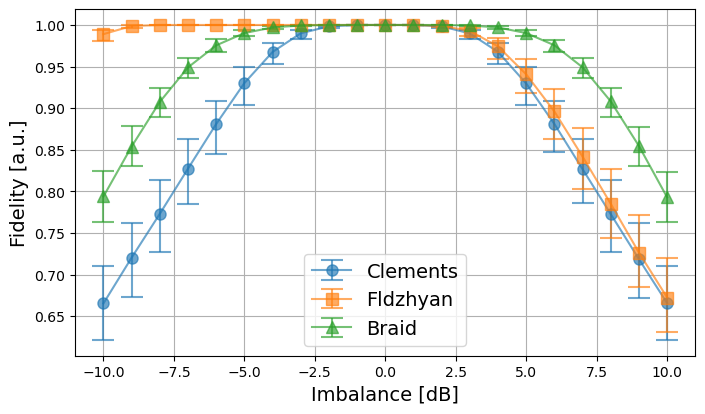

In [21]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_10_IMB_nonIDEAL/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print([1-x for x in q50])
    
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
print(imbalances)
plt.xlabel('Imbalance [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## BS Sweep IMB sigma
IL_MMI=0dB \
IMB=0,0,-3.5 +- SWEEP \
IL_CROSS=0dB \
CT=-1000dB

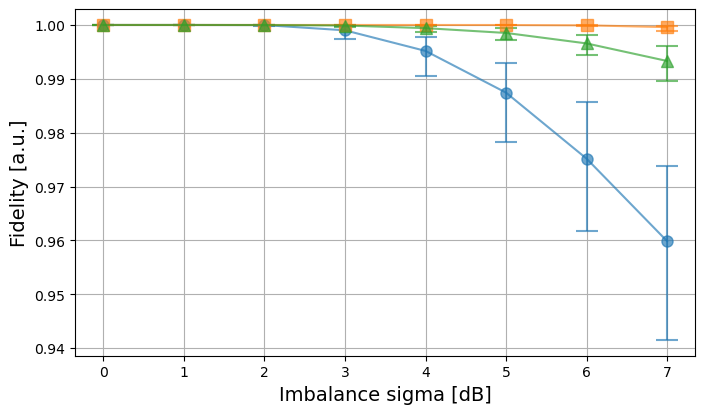

In [25]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_13_gaus_BS/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    if i_arct != 1:
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=0, ilPhSs=0,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=0,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    else:
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=0, ilPhSs=0,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=-3.5,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)

    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_sigma = [sim["imbalance_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalance_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance sigma [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

# Crossing

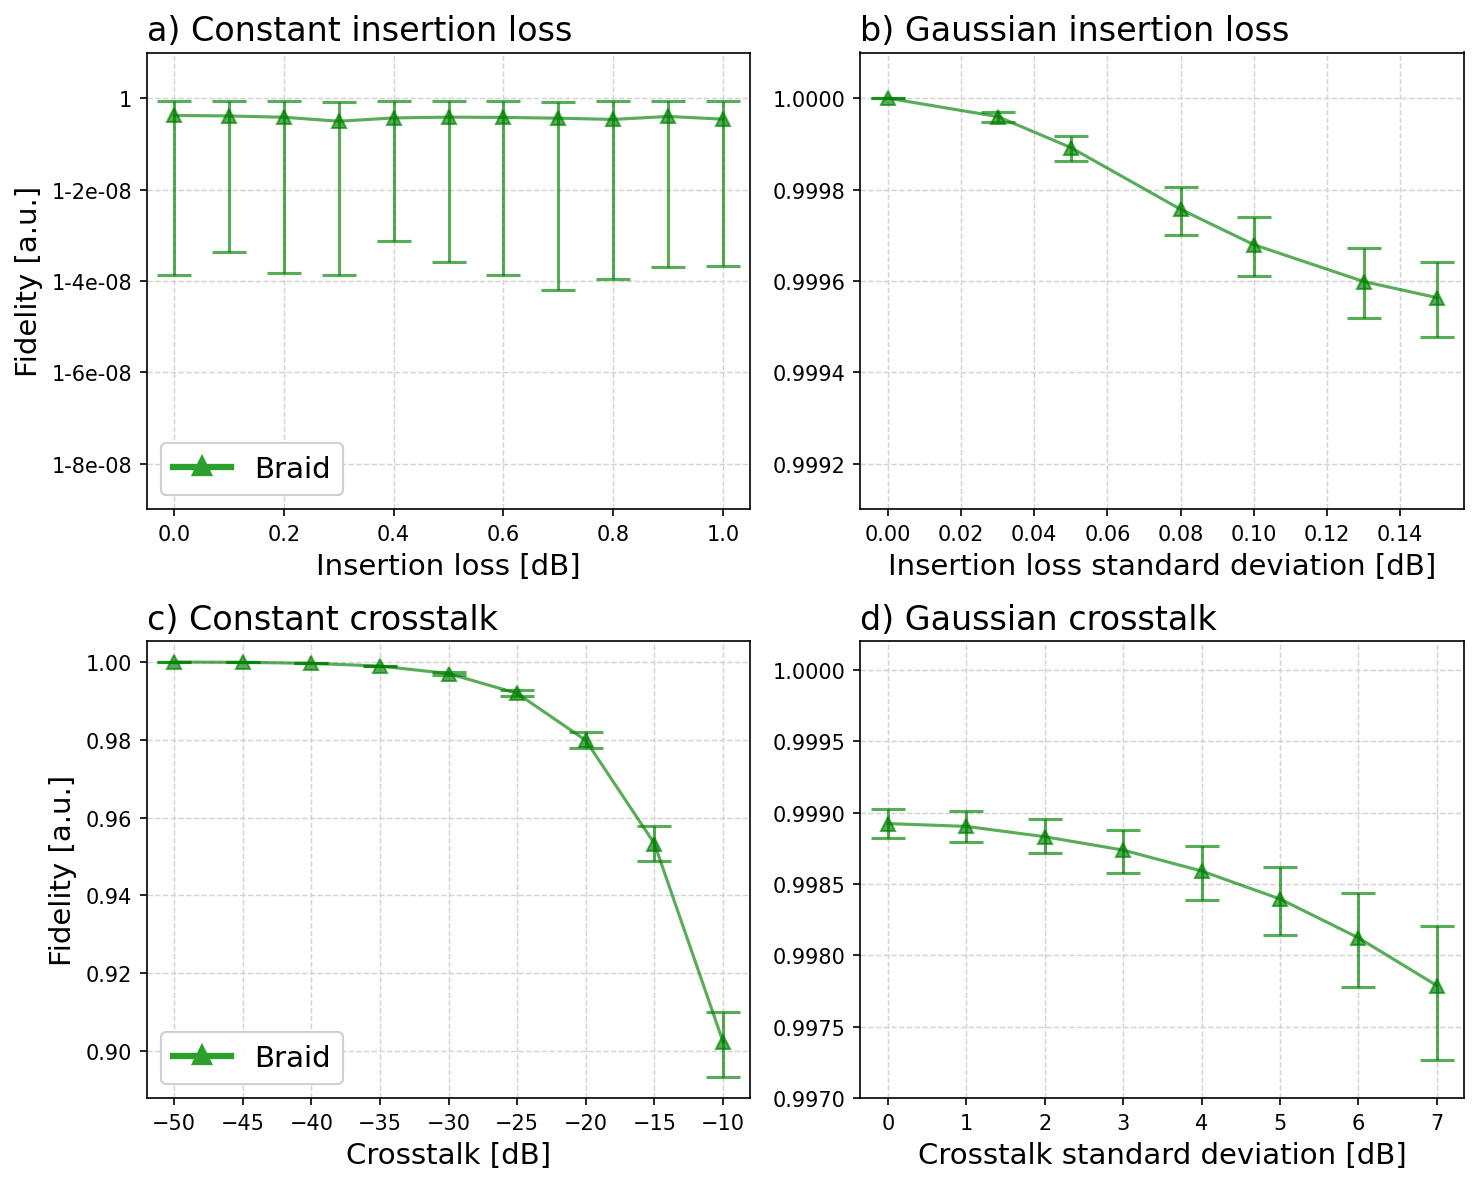

In [34]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

def filter_list_of_dicts(dict_list, IL_MMI, IMB, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0, CT=-1000)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        il_Crossing = [sim["il_cross_const"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        il_Crossing = [-x for x in il_Crossing]
        axs[0, 0].errorbar(il_Crossing, q50, yerr=[lower_error, upper_error],
                    marker=markers[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=7)
axs[0, 0].set_ylim([0.99999991, 1.00000001])
from matplotlib.ticker import FuncFormatter
def custom_ticks(x, pos):
    if x > 1-1e-10:
        return "1"
    return "1-"+f'{1 - x:.0e}'  # Format the tick label as 1 - x with 2 decimal places
axs[0, 0].yaxis.set_major_formatter(FuncFormatter(custom_ticks))
axs[0, 0].set_title('a) Constant insertion loss', loc='left', fontsize=16)
axs[0, 0].set_xlabel('Insertion loss [dB]', fontsize=14)
axs[0, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[0, 0].add_artist(axs[0, 0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3, lw=3, label=names_arct[2])],
    loc='lower left', fontsize=14))
axs[0, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_14_gaus_cross/'

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                   ilPhSm=0, ilPhSs=0,
                                                   ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                   ilCROSm=-0.2, ctCROSm=-1000, ctCROSs=0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        iloss_cross_sigma = [sim["iloss_cross_sigma"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        axs[0, 1].errorbar(iloss_cross_sigma, q50, yerr=[lower_error, upper_error],
                    marker=markers[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=7)
axs[0, 1].set_ylim([0.9991, 1.0001])
axs[0, 1].set_title('b) Gaussian insertion loss', loc='left', fontsize=16)
axs[0, 1].set_xlabel('Insertion loss standard deviation [dB]', fontsize=14)
# axs[0, 1].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[0, 1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == IL_CROSS:
            filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0, IL_CROSS=0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        CT_crossing = [sim["cross_talk_const"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        axs[1, 0].errorbar(CT_crossing[1:], q50[1:], yerr=[lower_error[1:], upper_error[1:]],
                    marker=markers[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=7)
axs[1, 0].set_title('c) Constant crosstalk', loc='left', fontsize=16)
axs[1, 0].set_xlabel('Crosstalk [dB]', fontsize=14)
axs[1, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[1, 0].add_artist(axs[1, 0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3,  lw=3, label=names_arct[2])],
    loc='lower left', fontsize=14))
axs[1, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_14_gaus_cross/'

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                   ilPhSm=0, ilPhSs=0,
                                                   ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                   ilCROSm=0, ilCROSs=0, ctCROSm=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        ct_cross_sigma = [sim["ct_cross_sigma"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        axs[1, 1].errorbar(ct_cross_sigma, q50, yerr=[lower_error, upper_error],
                    marker=markers[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=7)
axs[1, 1].set_ylim([0.997, 1.0002])
axs[1, 1].set_title('d) Gaussian crosstalk', loc='left', fontsize=16)
axs[1, 1].set_xlabel('Crosstalk standard deviation [dB]', fontsize=14)
# axs[1, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[1, 1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Crossing Sweep IL
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=SWEEP \
CT=-1000dB

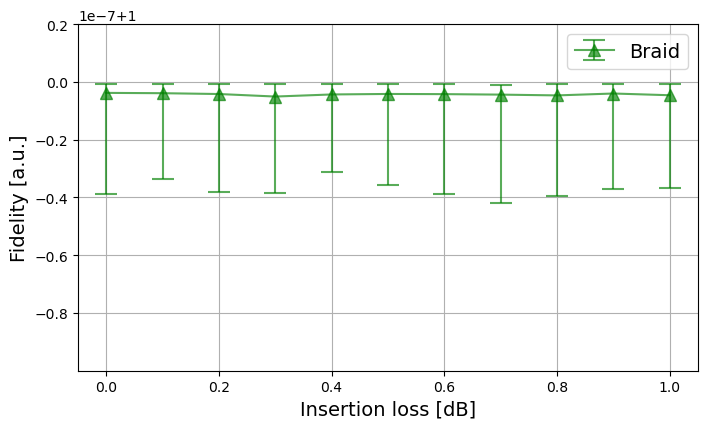

In [26]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0, CT=-1000)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        il_Crossing = [sim["il_cross_const"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        il_Crossing = [-x for x in il_Crossing]
        plt.errorbar(il_Crossing, q50, yerr=[lower_error, upper_error],
                    marker=marker[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=8)
plt.xlabel('Insertion loss [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.ylim([0.9999999, 1.00000002])
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Crossing Sweep IL sigma
IL_MMI=0dB \
IMB=0dB \
IL_CROSS= 0.2 +- SWEEP \
CT=-1000dB

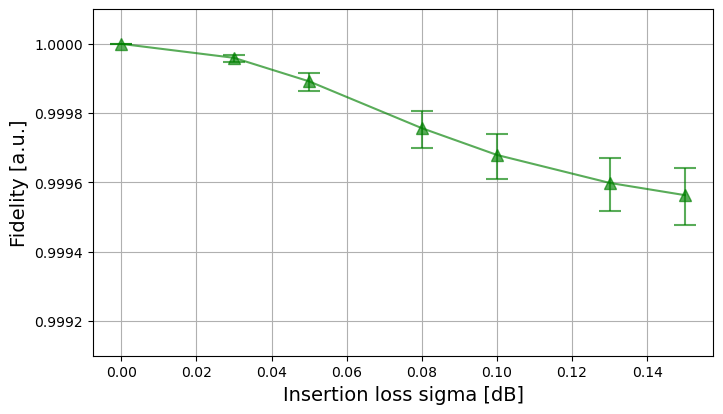

In [27]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_14_gaus_cross/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                   ilPhSm=0, ilPhSs=0,
                                                   ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                   ilCROSm=-0.2, ctCROSm=-1000, ctCROSs=0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        iloss_cross_sigma = [sim["iloss_cross_sigma"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        plt.errorbar(iloss_cross_sigma, q50, yerr=[lower_error, upper_error],
                    marker=marker[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=8)
plt.xlabel('Insertion loss sigma [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.ylim([0.9991, 1.0001])
# plt.legend()
plt.grid(True)
plt.show()

## Crossing Sweep CT
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=SWEEP

[0.9999999962206569, 0.9999595278691764, 0.9998759752587656, 0.9996287928172428, 0.9989226056523794, 0.9969931544182234, 0.9919031831036618, 0.9798161213422907, 0.953300055754495, 0.9023731041500349]
[-1000.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0]


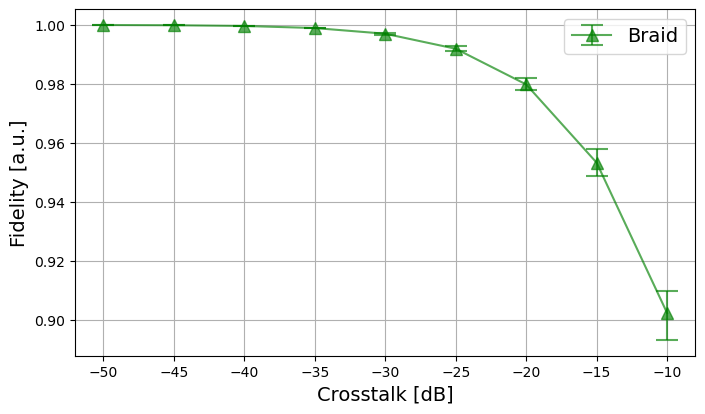

In [30]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_9_ILBSCross_CT/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == IL_CROSS:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0, IL_CROSS=0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        CT_crossing = [sim["cross_talk_const"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        print(q50)
        print(CT_crossing)
        plt.errorbar(CT_crossing[1:], q50[1:], yerr=[lower_error[1:], upper_error[1:]],
                    marker=marker[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=8)
plt.xlabel('Crosstalk [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Crossing Sweep CT sigma
IL_MMI=0dB \
IMB=0dB \
IL_CROSS= 0dB \
CT= -35 +- SWEEP

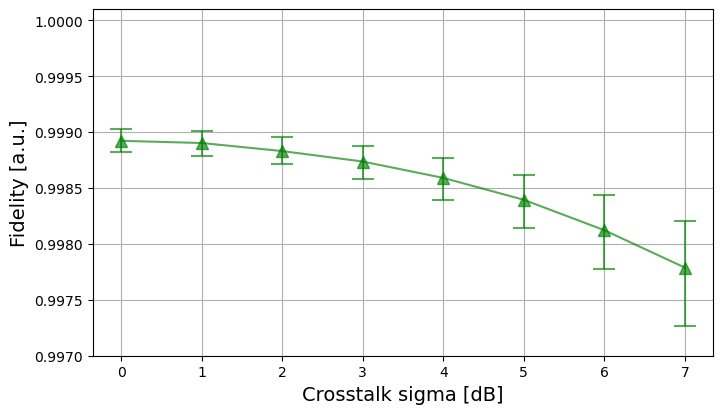

In [31]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_14_gaus_cross/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list,
                         ilPhSm, ilPhSs,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm and list(dictionary.values())[1] == ilPhSs:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct > 1:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                   ilPhSm=0, ilPhSs=0,
                                                   ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                   ilCROSm=0, ilCROSs=0, ctCROSm=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        ct_cross_sigma = [sim["ct_cross_sigma"] for sim in filtered_list_disct]
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        plt.errorbar(ct_cross_sigma, q50, yerr=[lower_error, upper_error],
                    marker=marker[i_arct], label=names_arct[i_arct],
                    color='green',
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=8)
plt.xlabel('Crosstalk sigma [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.ylim([0.997, 1.0001])
# plt.legend()
plt.grid(True)
plt.show()

# PhS Losses

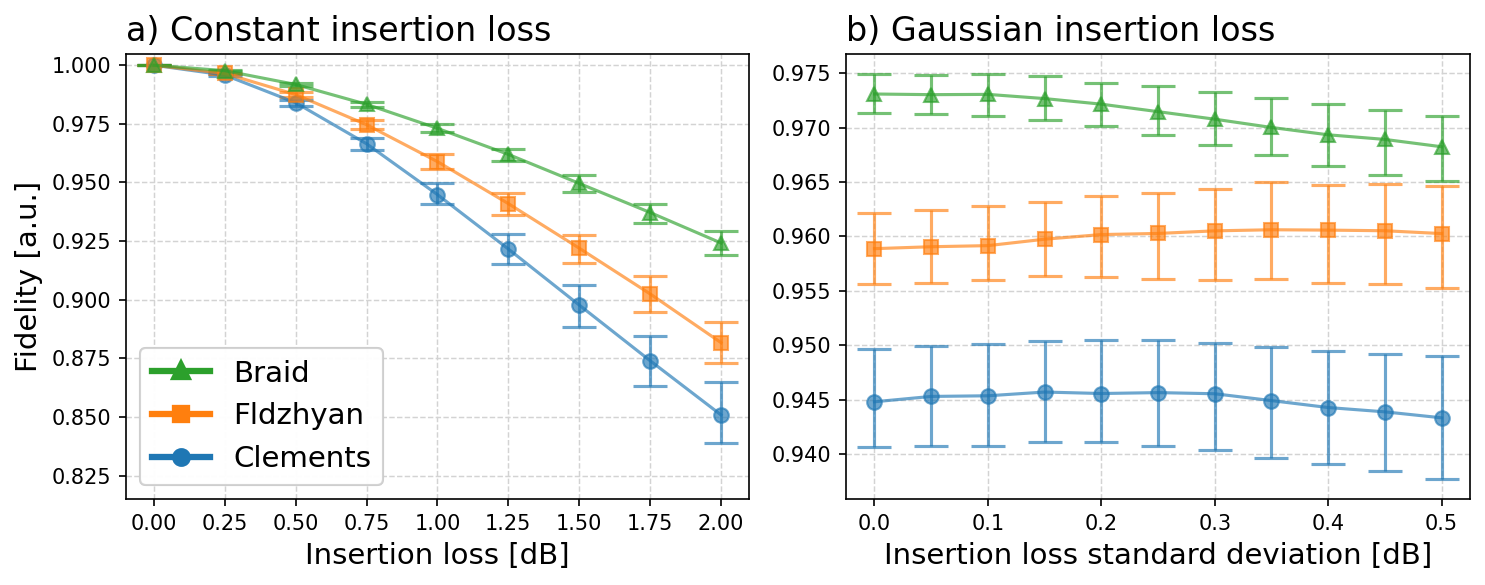

In [37]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0.0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[0].errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[0].set_ylim([0.815, 1.005])
axs[0].set_title('a) Constant insertion loss', loc='left', fontsize=16)
axs[0].set_xlabel('Insertion loss [dB]', fontsize=14)
axs[0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[0].add_artist(axs[0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3, lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3, lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3, lw=3, label=names_arct[0])],
    fontsize=14))
axs[0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_15_gaus_PhS/'

def filter_list_of_dicts(dict_list,
                         ilPhSm,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=-1,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[1].errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                marker=markers[i_arct], label=names_arct[i_arct],
                capsize=8, elinewidth=1.5, capthick=1.5,
                alpha=0.65, markersize=7)
# axs[1].set_ylim([0.935, 1.0005])
axs[1].set_title('b) Gaussian insertion loss', loc='left', fontsize=16)
axs[1].set_xlabel('Insertion loss standard deviation [dB]', fontsize=14)
# axs[1].set_ylabel('Fidelity [a.u.]', fontsize=14)
# axs[1].legend(loc='lower left', fontsize=14)
axs[1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Sweep IL Phase Shifter
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

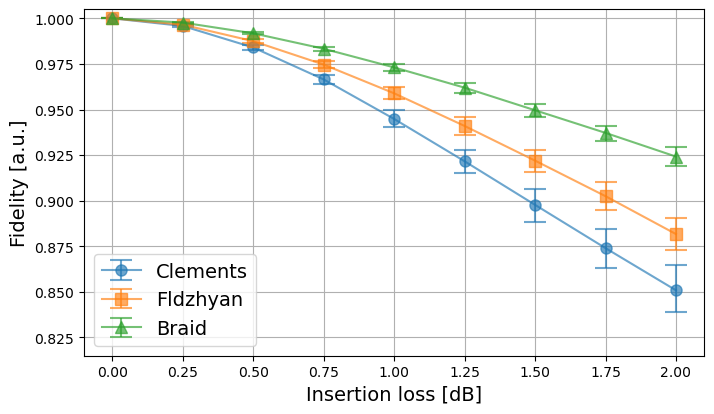

In [33]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0.0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('Insertion loss [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.ylim([0.815, 1.005])
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Sweep IL Phase Shifter
IL_PhS=1 +- SWEEP dB \
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

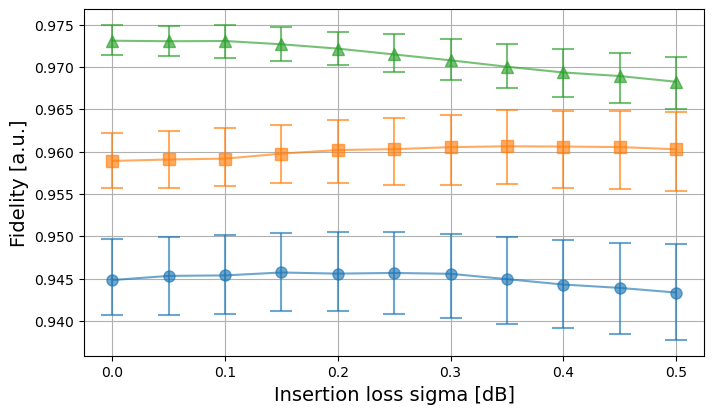

In [32]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_15_gaus_PhS/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list,
                         ilPhSm,
                         ilMMIm, ilMMIs, imbMMIm, imbMMIs,
                         ilCROSm, ilCROSs, ctCROSm, ctCROSs):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == ilPhSm:
            if list(dictionary.values())[2] == ilMMIm and list(dictionary.values())[3] == ilMMIs and list(dictionary.values())[4] == imbMMIm and list(dictionary.values())[5] == imbMMIs:
                if list(dictionary.values())[6] == ilCROSm and list(dictionary.values())[7] == ilCROSs and list(dictionary.values())[8] == ctCROSm and list(dictionary.values())[9] == ctCROSs:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations,
                                                ilPhSm=-1,
                                                ilMMIm=0, ilMMIs=0, imbMMIm=0, imbMMIs=0,
                                                ilCROSm=0, ilCROSs=0, ctCROSm=0, ctCROSs=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                marker=marker[i_arct], label=names_arct[i_arct],
                capsize=8, elinewidth=1.5, capthick=1.5,
                alpha=0.65, markersize=8)
plt.xlabel('Insertion loss sigma [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

# Instegrated all effects

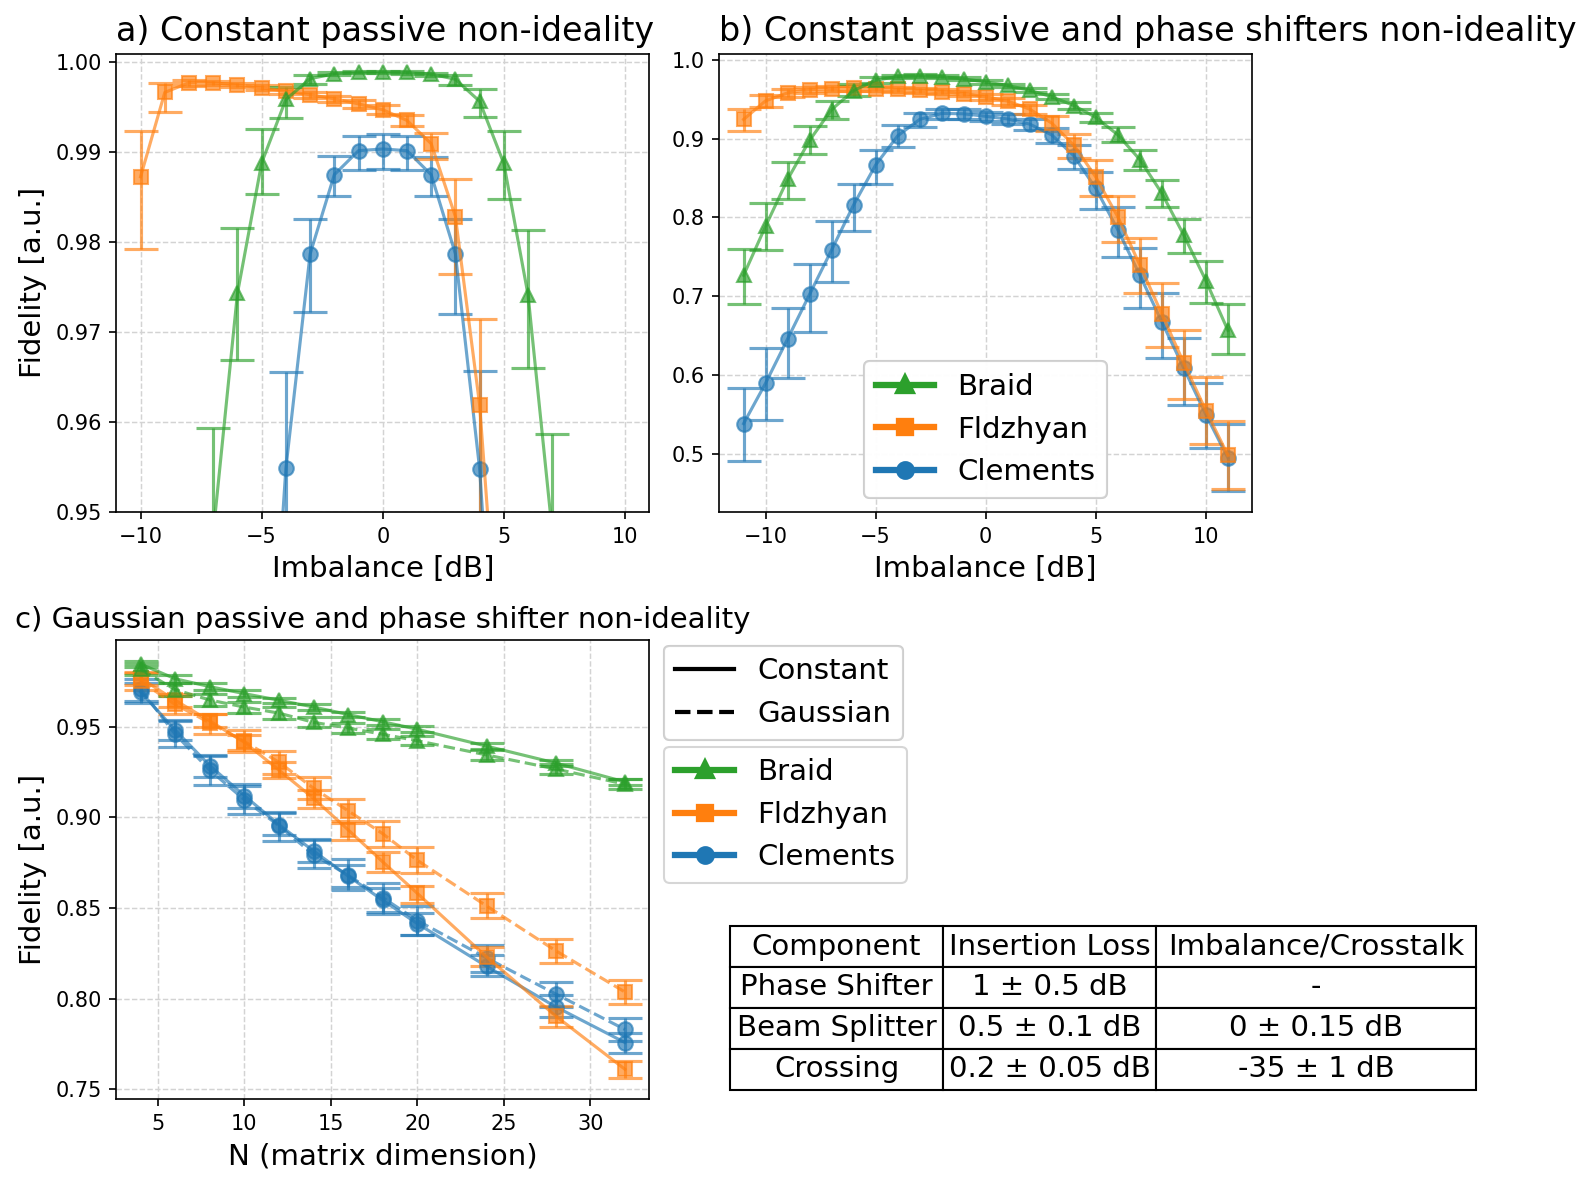

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_16_IMBpassiveReal/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

def filter_list_of_dicts(dict_list, IL_PhS, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == IL_PhS:
            if list(dictionary.values())[1] == IL_MMI:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_PhS=0, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_const = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[0, 0].errorbar(imbalance_const[1:-1], q50[1:-1], yerr=[lower_error[1:-1], upper_error[1:-1]],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[0, 0].set_ylim([0.95, 1.001])
axs[0, 0].set_title('a) Constant passive non-ideality', loc='left', fontsize=16)
axs[0, 0].set_xlabel('Imbalance [dB]', fontsize=14)
axs[0, 0].set_ylabel('Fidelity [a.u.]', fontsize=14)
axs[0, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_16_IMBpassiveReal/'

def filter_list_of_dicts(dict_list, IL_PhS, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == IL_PhS:
            if list(dictionary.values())[1] == IL_MMI:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_PhS=-1, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_const = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    axs[0, 1].errorbar(imbalance_const, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[0, 1].set_title("b) Constant passive and phase shifters non-ideality", loc='left', fontsize=16)
axs[0, 1].set_xlabel("Imbalance [dB]", fontsize=14)
axs[0, 1].add_artist(axs[0, 1].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3,  lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3,  lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3,  lw=3, label=names_arct[0])],
                                        fontsize=14))
axs[0, 1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name1 = 'organized_data/20240902_run_7_PCiloss/'
JSON_folder_name2 = 'organized_data/20240902_run_8_gaus/'

names_arct1 = ['Clements const', 'Fldzhyan const', 'Braid const',]
names_arct2 = ['Clements gauss', 'Fldzhyan gauss', 'Braid gauss',]

def filter_list_of_dicts1(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

def filter_list_of_dicts2(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32]

# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name1+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts1(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    axs[1, 0].errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct1[i_arct],
                 color=colors[i_arct], linestyle='-',
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
                 
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name2+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts2(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    axs[1, 0].errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct2[i_arct],
                 color=colors[i_arct], linestyle='--',
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)
axs[1, 0].set_title("c) Gaussian passive and phase shifter non-ideality", fontsize=14)
axs[1, 0].set_xlabel("N (matrix dimension)", fontsize=14)
axs[1, 0].set_ylabel("Fidelity [a.u.]", fontsize=14)
axs[1, 0].legend(loc='lower center', fontsize=14)

# Add a legend
# First legend for the color of the lines
color_legend = axs[1, 0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3,  lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3,  lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3,  lw=3, label=names_arct[0])],
    loc='upper left', bbox_to_anchor=(1., 0.8), fontsize=14)
# Second legend for the line style
style_legend = axs[1, 0].legend(handles=[Line2D([0], [0], color='black', linestyle='-', lw=2, label='Constant'),
                                         Line2D([0], [0], color='black', linestyle='--', lw=2, label='Gaussian')],
                                         loc='upper left', bbox_to_anchor=(1., 1.02), fontsize=14)
# Add the legends to the plot
axs[1, 0].add_artist(color_legend)
axs[1, 0].add_artist(style_legend)

axs[1, 0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)


data = {
    "Component": ["Phase Shifter", "Beam Splitter", "Crossing"],
    "Insertion Loss": ["1 ± 0.5 dB", "0.5 ± 0.1 dB", "0.2 ± 0.05 dB"],
    "Imbalance/Crosstalk": ["-", "0 ± 0.15 dB", "-35 ± 1 dB"]
}

# Create a DataFrame
df = pd.DataFrame(data)
axs[1, 1].axis('off')

# table = axs[1, 1].table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table = axs[1, 1].table(cellText=df.values, colLabels=df.columns,
                        loc='lower left', cellLoc='center',
                        colWidths=[0.4, 0.4, 0.6])

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)  # Adjust the scale as needed, 1 for width, 1.5 for height


# # Add annotation/text on the right side
# text = """
# - Phase shifter:
#    insertion loss = 1 ± 0.5 dB
# - Beam splitter
#    insertion loss = 0.5 ± 0.1 dB
#    imbalance = 0 ± 0.15 dB
# - Crossing
#    insertion loss = 0.2 ± 0.05 dB
#    crosstalk = -35 ± 1 dB
# """
# fig.text(0.75, 0.08, text, fontsize=16)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Sweep IMB
IL_PhS=0dB \
IL_MMI=0.5dB \
IMB=Sweep \
IL_CROSS=0.2dB \
CT=-35dB

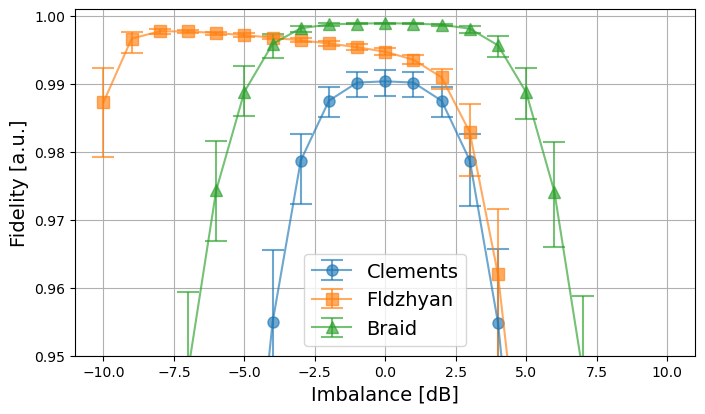

In [52]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_16_IMBpassiveReal/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_PhS, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == IL_PhS:
            if list(dictionary.values())[1] == IL_MMI:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_PhS=0, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_const = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalance_const[1:-1], q50[1:-1], yerr=[lower_error[1:-1], upper_error[1:-1]],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('Imbalance [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)

plt.ylim([0.95, 1.001])
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Sweep IMB
IL_PhS=1dB \
IL_MMI=0.5dB \
IMB=Sweep \
IL_CROSS=0.2dB \
CT=-35dB

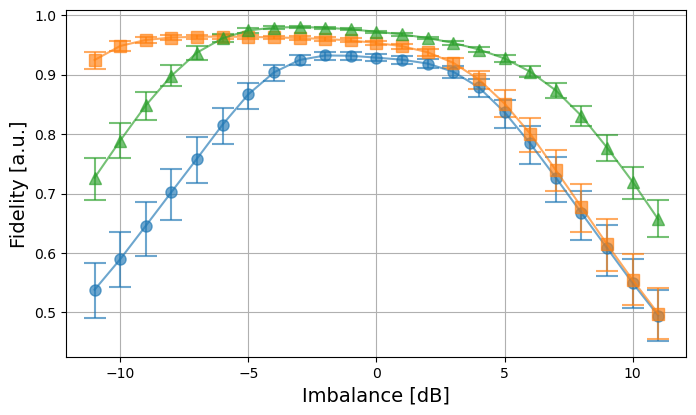

In [51]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_16_IMBpassiveReal/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_PhS, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == IL_PhS:
            if list(dictionary.values())[1] == IL_MMI:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_PhS=-1, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalance_const = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalance_const, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('Imbalance [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

## Sweep N Gaussian constant
----Phase Shifter---- \
IL PhS = 1 +- 0.5 \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

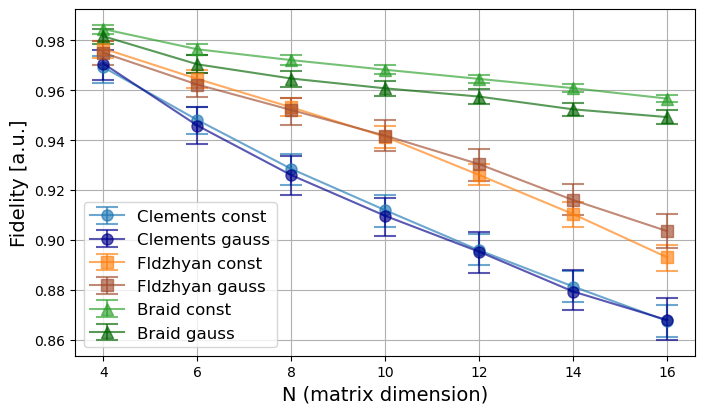

In [50]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name1 = 'organized_data/20240902_run_7_PCiloss/'
JSON_folder_name2 = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct1 = ['Clements const', 'Fldzhyan const', 'Braid const',]
names_arct2 = ['Clements gauss', 'Fldzhyan gauss', 'Braid gauss',]
marker = ['o', 's', '^']
color = ['darkblue', '#A14B2E', 'darkgreen']

def filter_list_of_dicts1(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

def filter_list_of_dicts2(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name1+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts1(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct1[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name2+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts2(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct2[i_arct],
                 color=color[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('N (matrix dimension)', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Power analysis

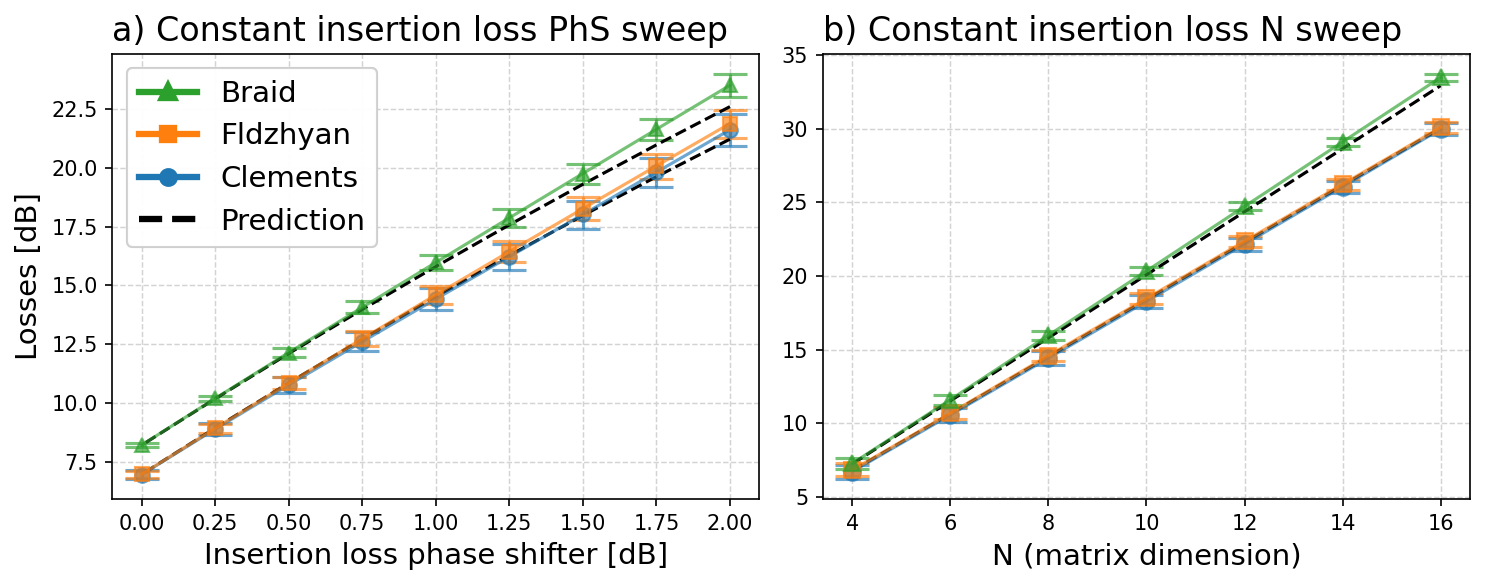

In [52]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_7_PCiloss_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
markers = ['o', 's', '^']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [sim["i_loss_q25_dB"] for sim in filtered_list_disct]  # 1st Quartile (Q1)
    q50 = [sim["i_loss_q50_dB"] for sim in filtered_list_disct]  # Median (Q2)
    q75 = [sim["i_loss_q75_dB"] for sim in filtered_list_disct]  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    axs[0].errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=markers[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=7)

n = 8
# ILPhS = -1.
ILBS = -0.5
ILCrossing = -0.2
ClemFldz = []
Bell = []
for ILPhS in PC_i_loss:
    PhS_even = 1/2+1/2*10**(-ILPhS/10)
    PhS_odd = ((n/2+1)+(n/2-1)*10**(-ILPhS/10))/n
    PhS_out = 10**(-ILPhS/10)
    BS_even = 10**(ILBS/10)
    BS_odd = (2+(n-2)*10**(ILBS/10))/n
    Crossing = 10**(ILCrossing/10)
    ClemFldz.append(-10*np.log10(PhS_even**n * PhS_odd**n * PhS_out * BS_even**n * BS_odd**n))
    Bell.append(-10*np.log10(PhS_even**(2*(n-1)) * PhS_out * BS_even**(2*(n-1)) * Crossing**(n-2)))
axs[0].plot(PC_i_loss, ClemFldz, linestyle='--', color='black')
axs[0].plot(PC_i_loss, Bell, linestyle='--',  color='black')

axs[0].set_title('a) Constant insertion loss PhS sweep', loc='left', fontsize=16)
axs[0].set_xlabel('Insertion loss phase shifter [dB]', fontsize=14)
axs[0].set_ylabel('Losses [dB]', fontsize=14)
axs[0].add_artist(axs[0].legend(handles=[
    Line2D([0], [0], color=colors[2], marker=markers[2], markeredgewidth=3, lw=3, label=names_arct[2]),
    Line2D([0], [0], color=colors[1], marker=markers[1], markeredgewidth=3, lw=3, label=names_arct[1]),
    Line2D([0], [0], color=colors[0], marker=markers[0], markeredgewidth=3, lw=3, label=names_arct[0]),
    Line2D([0], [0], color='black', linestyle='--', lw=3, label='Prediction')],
    fontsize=14))
axs[0].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# ==========================================================================================================
JSON_folder_name = 'organized_data/20240902_run_7_PCiloss_power/'

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_powers_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        q25.extend([sim["i_loss_q25_dB"] for sim in filtered_list_disct])  # 1st Quartile (Q1)
        q50.extend([sim["i_loss_q50_dB"] for sim in filtered_list_disct])  # Median (Q2)
        q75.extend([sim["i_loss_q75_dB"] for sim in filtered_list_disct])  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    axs[1].errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

ILPhS = -1.
ILBS = -0.5
ILCrossing = -0.2
ClemFldz = []
Bell = []
for n in ns:
    PhS_even = 1/2+1/2*10**(ILPhS/10)
    PhS_odd = ((n/2+1)+(n/2-1)*10**(ILPhS/10))/n
    PhS_out = 10**(ILPhS/10)
    BS_even = 10**(ILBS/10)
    BS_odd = (2+(n-2)*10**(ILBS/10))/n
    Crossing = 10**(ILCrossing/10)
    ClemFldz.append(-10*np.log10(PhS_even**n * PhS_odd**n * PhS_out * BS_even**n * BS_odd**n))
    Bell.append(-10*np.log10(PhS_even**(2*(n-1)) * PhS_out * BS_even**(2*(n-1)) * Crossing**(n-2)))
axs[1].plot(ns, ClemFldz, linestyle='--', color='black')
axs[1].plot(ns, Bell, linestyle='--',  color='black')

axs[1].set_title('b) Constant insertion loss N sweep', loc='left', fontsize=16)
axs[1].set_xlabel('N (matrix dimension)', fontsize=14)
axs[1].grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.7)



# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Phase shifter crossing graph

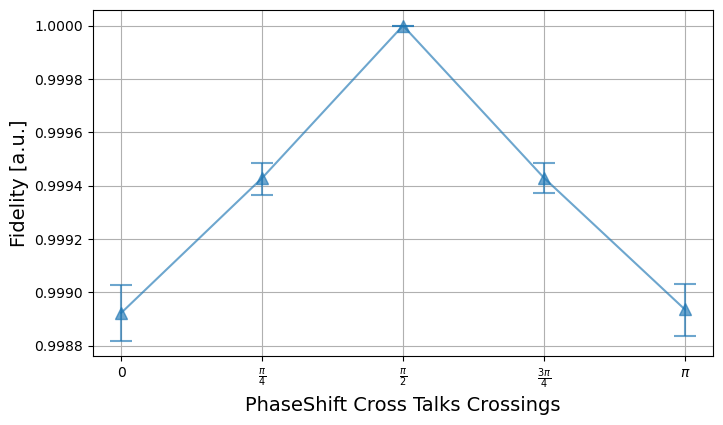

In [31]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20241209_run_19_ILCross_phase/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_PhS, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == IL_PhS:
            if list(dictionary.values())[1] == IL_MMI:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(8, 4.5))
# Download the file
for i_arct, arct in enumerate(models_choise):
    if i_arct == 2:

        file_JSON = "20240902_traking_fidelities_NEUROPULSCrossingSide_Arct_N8.json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_PhS=0, IL_MMI=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        phase_const = ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']
        q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
        q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
        q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
        plt.errorbar(phase_const, q50, yerr=[lower_error, upper_error],
                    marker=marker[i_arct], label=names_arct[i_arct],
                    capsize=8, elinewidth=1.5, capthick=1.5,
                    alpha=0.65, markersize=8)

plt.xlabel('PhaseShift Cross Talks Crossings', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

## Combine a few passive effects

Just for the Fldzyna but not even optimal here

[0.9977054754518146, 0.9976126992572505, 0.9975046587456278, 0.9973538799360688, 0.9971891107704012, 0.996991924809354, 0.9967969458728664, 0.9966197897354766, 0.9964109139780147, 0.9961755664808485, 0.9959511713491003]


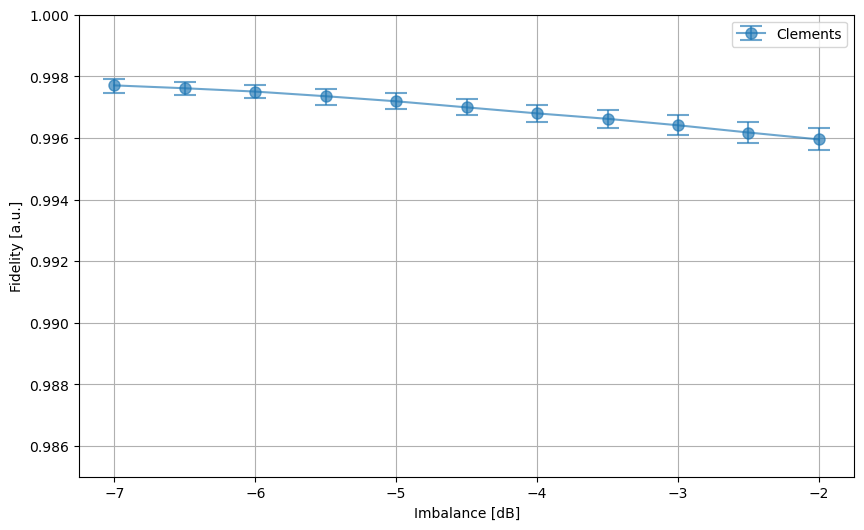

In [32]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_12_IMBreal/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]
models_choise = [
    'Fldzhyan_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print(q50)
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.ylim([0.985, 1.])
plt.legend()
plt.grid(True)
plt.show()

## Sweep IMB
IL_MMI=0dB \
IMB=SWEEP \
IL_CROSS=0dB \
CT=-1000dB

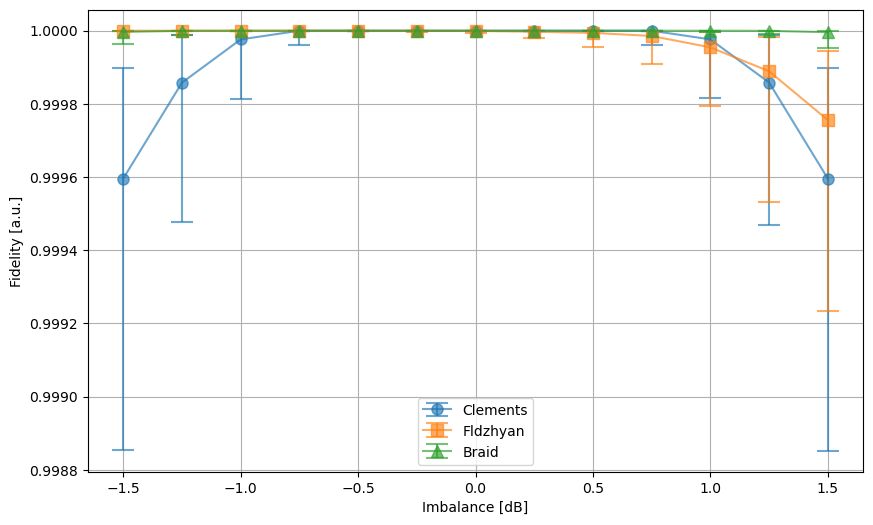

In [33]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep IMB
IL_MMI=0.5dB \
IMB=SWEEP \
IL_CROSS=0.2dB \
CT=-35dB

[0.9894215076832547, 0.9899121936094226, 0.9902030166639975, 0.9902903138922015, 0.9903460075266011, 0.990387818953123, 0.9903878056531118, 0.9903878168042102, 0.9903459945229705, 0.9902903114459652, 0.9902030176592437, 0.989912193402663, 0.9894215082585778]
[0.9957102729553732, 0.9955600736479245, 0.9954006356887912, 0.9952473416091481, 0.9951214765515977, 0.9949709319523709, 0.9947486709143359, 0.9945112543211327, 0.994258871046986, 0.9939845218821661, 0.9935625947092137, 0.9932175672655039, 0.9926447965904928]
[0.9988497156727192, 0.9988720838864455, 0.9988952901452743, 0.9989176836293803, 0.998927271438798, 0.9989272320585851, 0.9989321024449618, 0.9989212800845693, 0.9989111682726965, 0.9988999724624401, 0.9988911569947551, 0.9988747252512793, 0.9988435335605128]


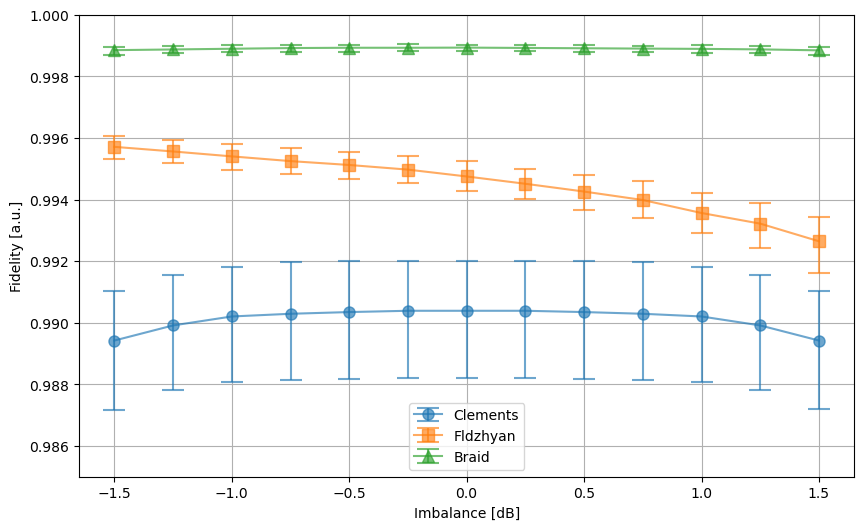

In [34]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print(q50)
    plt.errorbar(imbalances, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Imbalance [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.ylim([0.985, 1.])
plt.legend()
plt.grid(True)
plt.show()

## Sweep N with fix imbalance

Best IMB for Fldzhyan architecture

IL_MMI=0.5dB \
IMB=-0.5dB \
IL_CROSS=0.2dB \
CT=-35dB

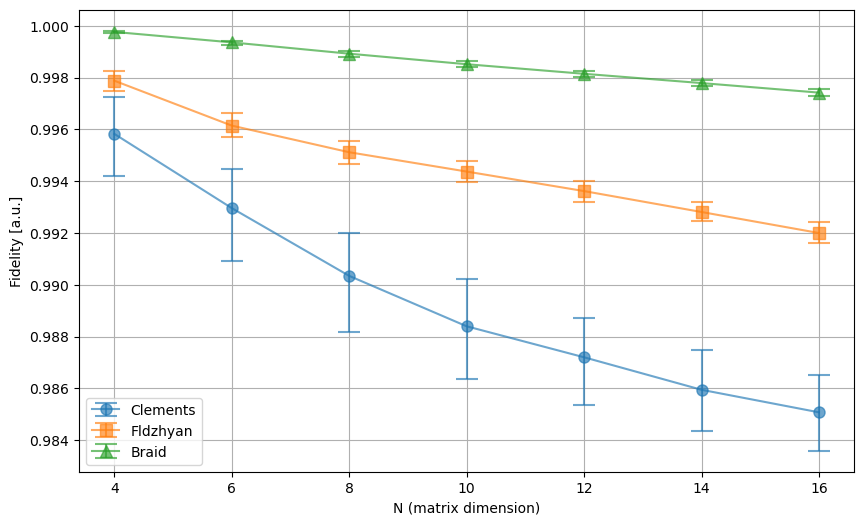

In [35]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_6_imb/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=0, IL_MMI=-0.5, IMB=-0.5, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

# PhS Losses

## Sweep IL Phase Shifter
IL_MMI=0dB \
IMB=0dB \
IL_CROSS=0dB \
CT=-1000dB

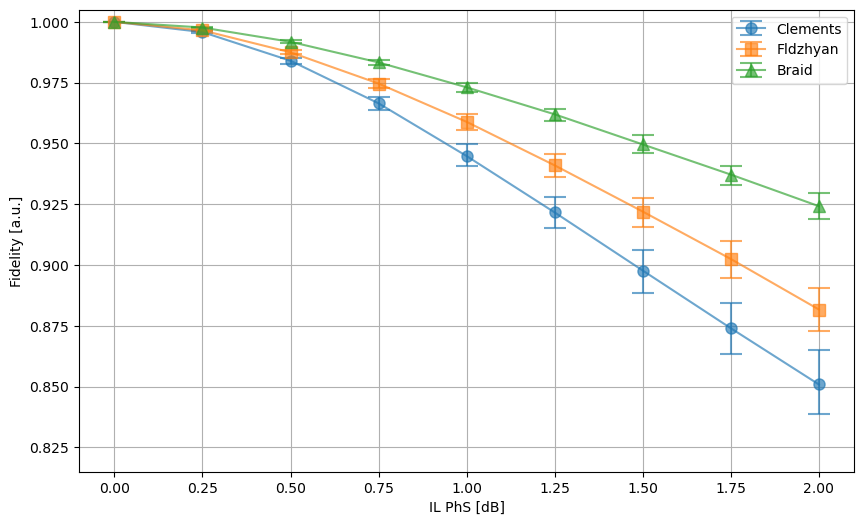

In [36]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=0, IMB=0.0, IL_CROSS=0, CT=-1000)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('IL PhS [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.ylim([0.815, 1.005])
plt.legend()
plt.grid(True)
plt.show()

## Sweep IL Phase Shifter
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

Clements_Arct
[0.8369125170109719, 0.8585001924995159, 0.8816748683059576, 0.9053478301927207, 0.9285150697751502, 0.9502875198146136, 0.9689738465669337, 0.9828143494768686, 0.9903878056531118]
[0.02838935 0.02465858 0.0208568  0.01606718 0.01244483 0.00981343
 0.00750283 0.00544467 0.00382153]
Fldzhyan_Arct
[0.8793826996788701, 0.8989815002045185, 0.9183634932893261, 0.9361408178906432, 0.9531746557139746, 0.968641715389863, 0.981108779295206, 0.9900946485882599, 0.9947486709143359]
[0.01882676 0.01544866 0.01286597 0.01028924 0.00749909 0.00511311
 0.00297315 0.00162549 0.00097415]
NEUROPULSCrossingSide_Arct
[0.9227036257030061, 0.9357083941001237, 0.9485850832311353, 0.9607291752500252, 0.9720822082620424, 0.9824501245920692, 0.9907199906150793, 0.9966171409288902, 0.9989321024449618]
[0.00992959 0.00843615 0.00710424 0.00510773 0.003956   0.00244845
 0.00130369 0.0005338  0.00019224]


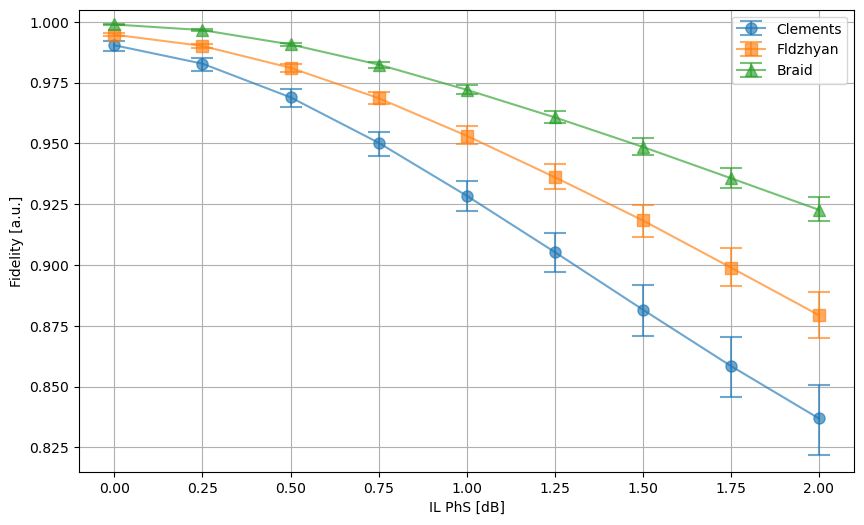

In [37]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print(arct)
    print(q50)
    print(upper_error+lower_error)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('IL PhS [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.ylim([0.815, 1.005])
plt.legend()
plt.grid(True)
plt.show()

## Sweep N with IL Phase Shifter

IL_PhS=1.0dB \
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

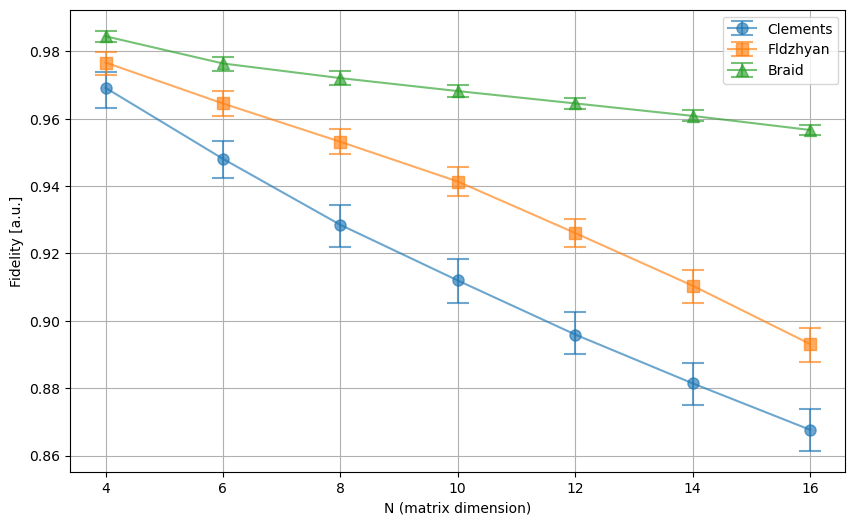

In [38]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant over time fabrication tollerance
----Phase Shifter---- \
IL PhS = 0.0 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

Clements_Arct
[0.9913520313357709, 0.9894887489900516, 0.9867984179321166, 0.9832133465542557, 0.9787771345526737, 0.9738993111590251]
[0.00344423 0.0043131  0.00500388 0.00568594 0.00671801 0.00760206]
Fldzhyan_Arct
[0.9944853150079692, 0.9933798441673124, 0.9915371251275513, 0.9892743779593367, 0.9864458349734235, 0.9831025110889662]
[0.0013207  0.00145928 0.00190043 0.00243781 0.00327291 0.00408794]
NEUROPULSCrossingSide_Arct
[0.9979199317021055, 0.99745395074886, 0.9962698555104847, 0.9944388596512047, 0.9920853806287974, 0.9891298974160125]
[0.00049081 0.0005763  0.00089018 0.00124309 0.00184923 0.00249115]


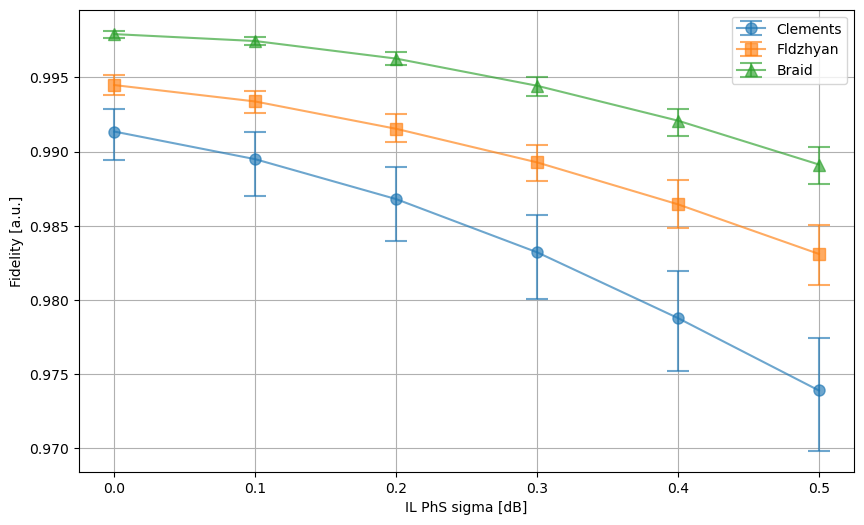

In [39]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=0, IMBMU=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print(arct)
    print(q50)
    print(upper_error+lower_error)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant with phase changers losses
----Phase Shifter---- \
IL PhS = 1 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

Clements_Arct
[0.9296274512860876, 0.9298648985155888, 0.9301839593534591, 0.9297740495695126, 0.92874059306899, 0.9260312398132882]
0.0035962114727994265
[0.01228475 0.0127346  0.01318657 0.01364982 0.01475216 0.01578148]
Fldzhyan_Arct
[0.9540912634998916, 0.9546040596466501, 0.954837448583459, 0.9544184090350163, 0.9538905784371423, 0.9520931887576163]
0.001998074742275313
[0.00834104 0.00768809 0.00870848 0.00870717 0.00985865 0.01069744]
NEUROPULSCrossingSide_Arct
[0.9717478526339273, 0.9717697659586368, 0.971082594580635, 0.969561000429435, 0.9675333326301905, 0.9647084782716384]
0.007039374362288853
[0.00429582 0.00441298 0.00496947 0.00557047 0.00584835 0.00663433]


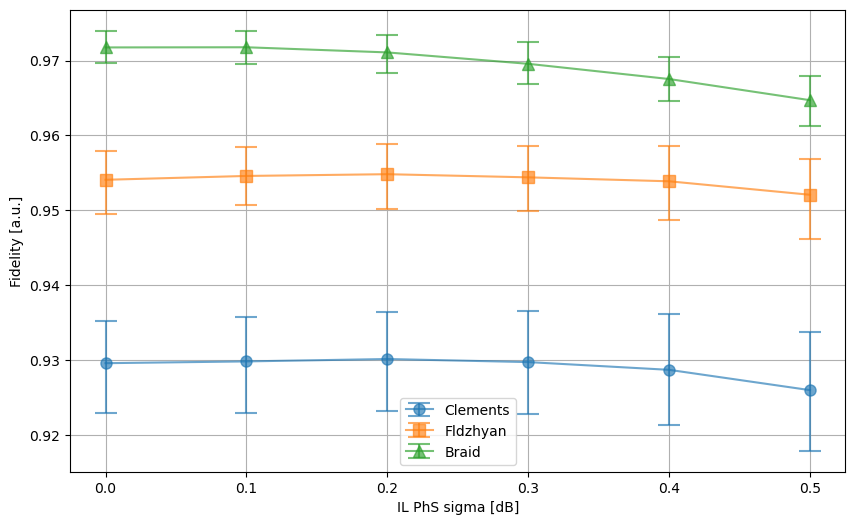

In [40]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_fidelities_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, IMBMU=0)
    fidelities = [sim["fidelities"] for sim in filtered_list_disct]
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [np.percentile(fid, 25) for fid in fidelities]  # 1st Quartile (Q1)
    q50 = [np.percentile(fid, 50) for fid in fidelities]  # Median (Q2)
    q75 = [np.percentile(fid, 75) for fid in fidelities]  # 3rd Quartile (Q3)
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    print(arct)
    print(q50)
    print(q50[0]-q50[-1])
    print(upper_error+lower_error)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

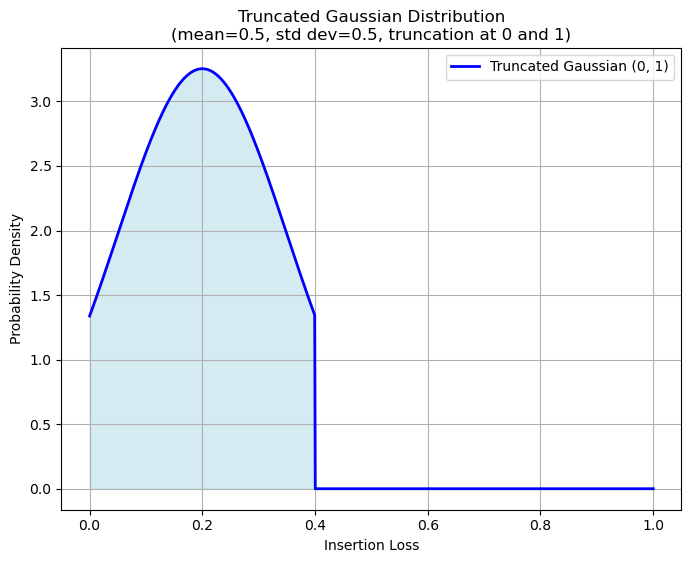

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Parameters for the truncated Gaussian
mu = 0.2  # Mean
sigma = 0.15  # Standard deviation
a, b = 0, 0.4  # Truncation limits

# Calculate the range for truncation in the standard normal form
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma

# Generate a truncated normal distribution
truncated_gaussian = truncnorm(a_std, b_std, loc=mu, scale=sigma)

# Plot the PDF
x = np.linspace(0, 1, 1000)
pdf = truncated_gaussian.pdf(x)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Truncated Gaussian (0, 1)', color='blue', lw=2)
plt.fill_between(x, pdf, color='lightblue', alpha=0.5)
plt.title('Truncated Gaussian Distribution\n(mean=0.5, std dev=0.5, truncation at 0 and 1)')
plt.xlabel('Insertion Loss')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

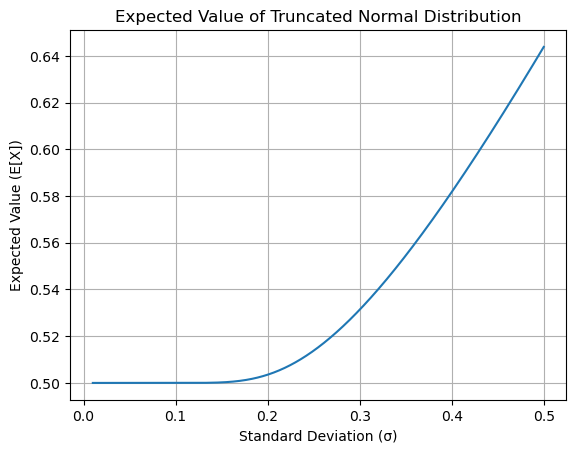

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0.5
sigma_values = np.linspace(0.01, 0.5, 1000)
expected_values = []

for sigma in sigma_values:
    alpha = -mu / sigma
    phi_alpha = norm.pdf(alpha)
    Phi_alpha = norm.cdf(alpha)
    lambda_alpha = phi_alpha / (1 - Phi_alpha)
    E_X = mu + sigma * lambda_alpha
    expected_values.append(E_X)

plt.plot(sigma_values, expected_values)
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Value (E[X])')
plt.title('Expected Value of Truncated Normal Distribution')
plt.grid(True)
plt.show()

## Sweep N Gaussian constant
----Phase Shifter---- \
IL PhS = 1 +- 0.5 \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

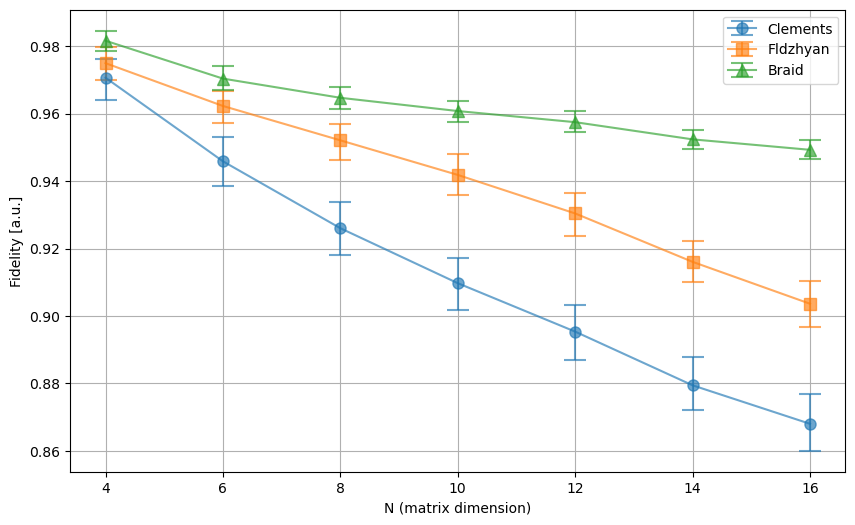

In [43]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

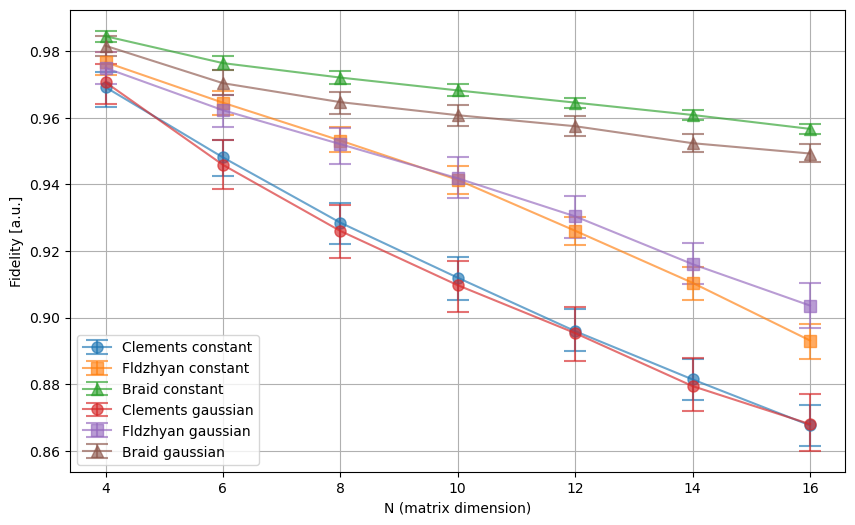

In [44]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements constant', 'Fldzhyan constant', 'Braid constant',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

JSON_folder_name = 'organized_data/20240902_run_8_gaus/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements gaussian', 'Fldzhyan gaussian', 'Braid gaussian',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_fidelities_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        fidelities = [sim["fidelities"] for sim in filtered_list_disct]
        q25.extend([np.percentile(fid, 25) for fid in fidelities])  # 1st Quartile (Q1)
        q50.extend([np.percentile(fid, 50) for fid in fidelities])  # Median (Q2)
        q75.extend([np.percentile(fid, 75) for fid in fidelities])  # 3rd Quartile (Q3)
        lower_error = np.array(q50) - np.array(q25)
        upper_error = np.array(q75) - np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)


plt.xlabel('N (matrix dimension)')
plt.ylabel('Fidelity [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

# Power Analysis

## Sweep IL Phase Shifter
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

[1.33944098 1.26176848 1.17373077 1.06765243 0.94418423 0.80717453
 0.65647085 0.50312829 0.37984905]
[1.16870398 1.0798909  0.98593892 0.88069706 0.76947523 0.64945511
 0.52430996 0.40122904 0.30895375]
[1.00401155 0.92575533 0.83799125 0.7385874  0.62899847 0.50488874
 0.37038914 0.22864327 0.1377807 ]


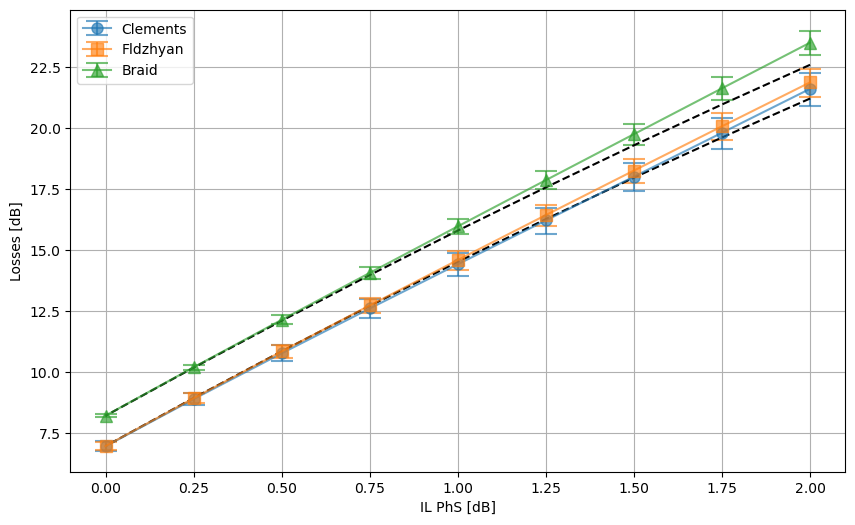

In [45]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
            if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    PC_i_loss = [-x for x in PC_i_loss]
    q25 = [sim["i_loss_q25_dB"] for sim in filtered_list_disct]  # 1st Quartile (Q1)
    q50 = [sim["i_loss_q50_dB"] for sim in filtered_list_disct]  # Median (Q2)
    q75 = [sim["i_loss_q75_dB"] for sim in filtered_list_disct]  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    print(upper_error+lower_error)
    plt.errorbar(PC_i_loss, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

n = 8
# ILPhS = -1.
ILBS = -0.5
ILCrossing = -0.2
ClemFldz = []
Bell = []
for ILPhS in PC_i_loss:
    PhS_even = 1/2+1/2*10**(-ILPhS/10)
    PhS_odd = ((n/2+1)+(n/2-1)*10**(-ILPhS/10))/n
    PhS_out = 10**(-ILPhS/10)
    BS_even = 10**(ILBS/10)
    BS_odd = (2+(n-2)*10**(ILBS/10))/n
    Crossing = 10**(ILCrossing/10)
    ClemFldz.append(-10*np.log10(PhS_even**n * PhS_odd**n * PhS_out * BS_even**n * BS_odd**n))
    Bell.append(-10*np.log10(PhS_even**(2*(n-1)) * PhS_out * BS_even**(2*(n-1)) * Crossing**(n-2)))
plt.plot(PC_i_loss, ClemFldz, linestyle='--', color='black')
plt.plot(PC_i_loss, Bell, linestyle='--',  color='black')

plt.xlabel('IL PhS [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

## Sweep N with IL Phase Shifter

IL_PhS=1.0dB \
IL_MMI=0.5dB \
IMB=0dB \
IL_CROSS=0.2dB \
CT=-35dB

[0.95708451 0.96584135 0.94418423 0.89791709 0.86984264 0.83937302
 0.81626235]
[0.87131594 0.81404612 0.76947523 0.73165015 0.72664475 0.7252103
 0.73849391]
[0.70223496 0.68801321 0.62899847 0.57883462 0.54625988 0.52152414
 0.50451375]


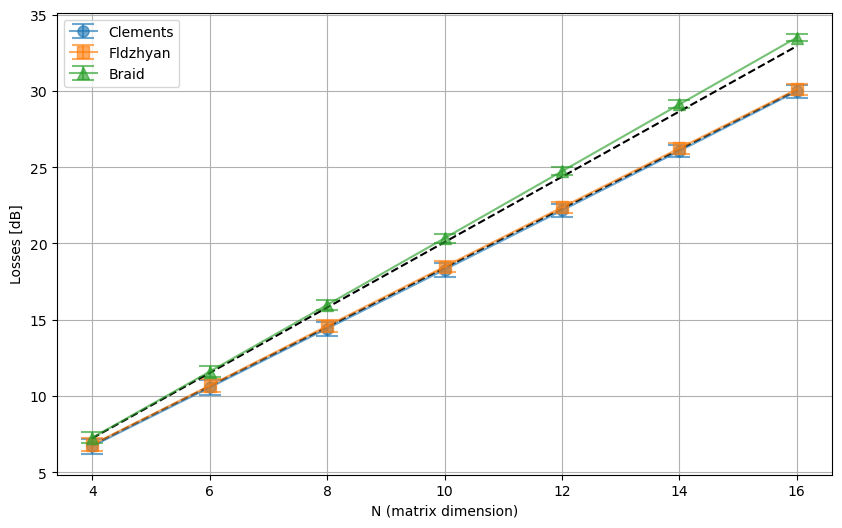

In [46]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_7_PCiloss_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PC_IL, IL_MMI, IMB, IL_CROSS, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PC_IL:
            if list(dictionary.values())[1] == IL_MMI and list(dictionary.values())[2] == IMB:
                if list(dictionary.values())[3] == IL_CROSS and list(dictionary.values())[4] == CT:
                    filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_powers_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PC_IL=-1, IL_MMI=-0.5, IMB=0, IL_CROSS=-0.2, CT=-35)
        q25.extend([sim["i_loss_q25_dB"] for sim in filtered_list_disct])  # 1st Quartile (Q1)
        q50.extend([sim["i_loss_q50_dB"] for sim in filtered_list_disct])  # Median (Q2)
        q75.extend([sim["i_loss_q75_dB"] for sim in filtered_list_disct])  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    print(upper_error+lower_error)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)

ILPhS = -1.
ILBS = -0.5
ILCrossing = -0.2
ClemFldz = []
Bell = []
for n in ns:
    PhS_even = 1/2+1/2*10**(ILPhS/10)
    PhS_odd = ((n/2+1)+(n/2-1)*10**(ILPhS/10))/n
    PhS_out = 10**(ILPhS/10)
    BS_even = 10**(ILBS/10)
    BS_odd = (2+(n-2)*10**(ILBS/10))/n
    Crossing = 10**(ILCrossing/10)
    ClemFldz.append(-10*np.log10(PhS_even**n * PhS_odd**n * PhS_out * BS_even**n * BS_odd**n))
    Bell.append(-10*np.log10(PhS_even**(2*(n-1)) * PhS_out * BS_even**(2*(n-1)) * Crossing**(n-2)))
plt.plot(ns, ClemFldz, linestyle='--', color='black')
plt.plot(ns, Bell, linestyle='--',  color='black')

plt.xlabel('N (matrix dimension)')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant with phase changers losses
----Phase Shifter---- \
IL PhS = 0 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

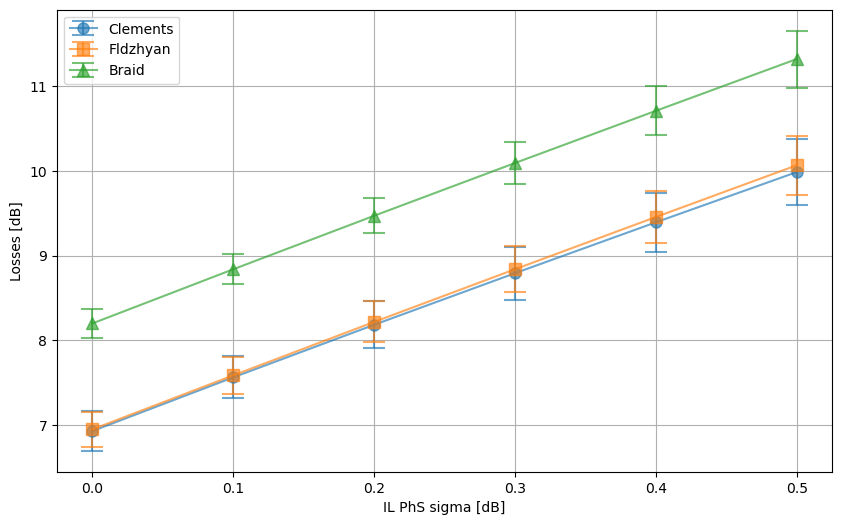

In [47]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=0, IMBMU=0)
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [sim["i_loss_q25_dB"] for sim in filtered_list_disct]  # 1st Quartile (Q1)
    q50 = [sim["i_loss_q50_dB"] for sim in filtered_list_disct]  # Median (Q2)
    q75 = [sim["i_loss_q75_dB"] for sim in filtered_list_disct]  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

## Gaussian constant with phase changers losses
----Phase Shifter---- \
IL PhS = 1 +- sweep \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

Clements_Arct
[0.98422368 0.98758737 1.01440129 1.0591834  1.11563867 1.18016967]
Fldzhyan_Arct
[0.81828509 0.81823087 0.84773577 0.89909358 0.96404191 1.03496645]
NEUROPULSCrossingSide_Arct
[0.69961454 0.71076342 0.76664726 0.85127501 0.94543812 1.03870026]


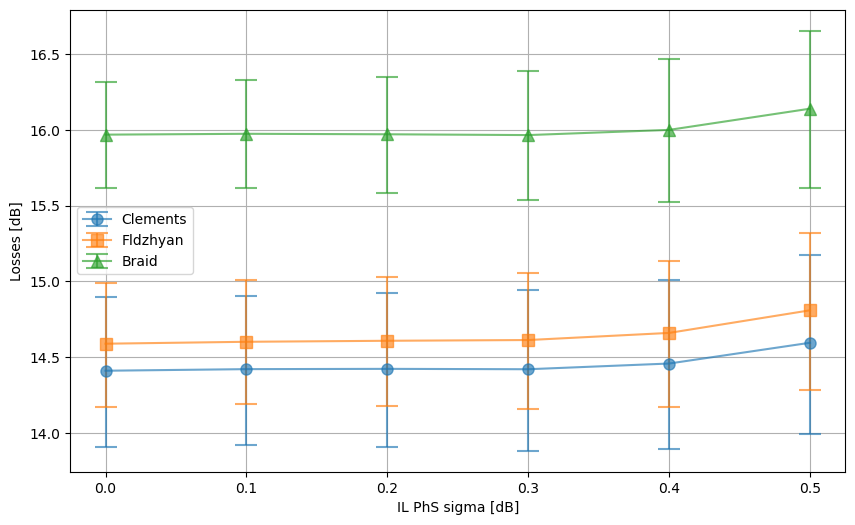

In [48]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "20240902_traking_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, IMBMU=0)
    pc_iloss_sigma = [sim["pc_iloss_sigma"] for sim in filtered_list_disct]
    q25 = [sim["i_loss_q25_dB"] for sim in filtered_list_disct]  # 1st Quartile (Q1)
    q50 = [sim["i_loss_q50_dB"] for sim in filtered_list_disct]  # Median (Q2)
    q75 = [sim["i_loss_q75_dB"] for sim in filtered_list_disct]  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    print(arct)
    print(lower_error+upper_error)
    plt.errorbar(pc_iloss_sigma, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('IL PhS sigma [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# From equations:
import numpy as np

n = 8.
ILPhS = -1.
ILBS = -0.5
ILCrossing = -0.2

PhS_even = 1/2+1/2*10**(ILPhS/10)
PhS_odd = ((n/2+1)+(n/2-1)*10**(ILPhS/10))/n
PhS_out = 10**(ILPhS/10)
BS_even = 10**(ILBS/10)
BS_odd = (2+(n-2)*10**(ILBS/10))/n
Crossing = 10**(ILCrossing/10)

ClemFldz = 10*np.log10(PhS_even**n * PhS_odd**n * PhS_out * BS_even**n * BS_odd**n)
print(ClemFldz)
Bell = 10*np.log10(PhS_even**(2*(n-1)) * PhS_out * BS_even**(2*(n-1)) * Crossing**(n-2))
print(Bell)

-14.514894598973445
-15.797934646815953


## Sweep N Gaussian constant
----Phase Shifter---- \
IL PhS = 1 +- 0.5 \
----BS---- \
IL BS = 0.5 +- 0.1 \
IMB: 0 +- 0.15 \
----Crossing---- \
IL Crossing: 0.2 +- 0.05 \
CT: -35.0 +- 1.0

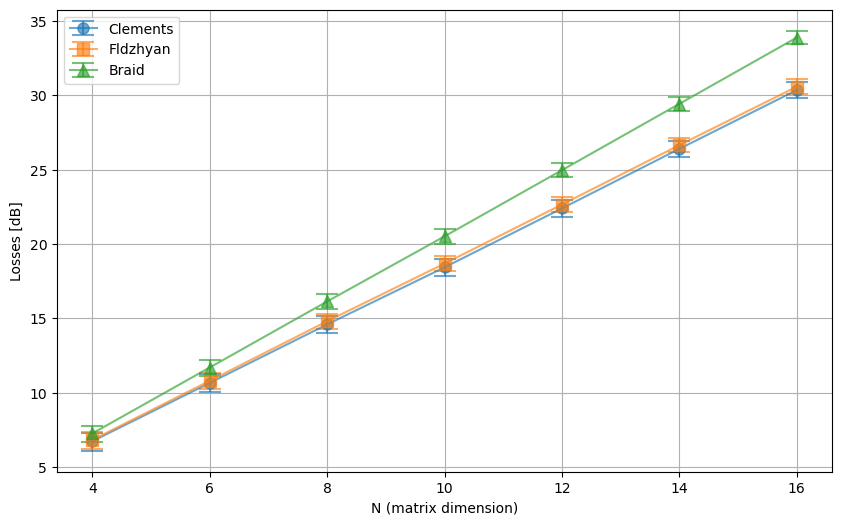

In [50]:
# Create the grapth
import json
import matplotlib.pyplot as plt
import numpy as np

JSON_folder_name = 'organized_data/20240902_run_8_gaus_power/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

def filter_list_of_dicts(dict_list, PCILMU, PCILSIGMA, IMBMU):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[0] == PCILMU and list(dictionary.values())[1] == PCILSIGMA and list(dictionary.values())[4] == IMBMU:
            filtered_list.append(dictionary)
    return filtered_list

ns = [4, 6, 8, 10, 12, 14, 16]

plt.figure(figsize=(10, 6))
# Download the file
for i_arct, arct in enumerate(models_choise):
    q25 = []
    q50 = []
    q75 = []
    for n in ns:
        file_JSON = "20240902_traking_powers_"+arct+"_N"+str(n)+".json"
        with open(JSON_folder_name+file_JSON, 'r') as file:
            data = json.load(file)
        simulations = data["simulations"]
        filtered_list_disct = filter_list_of_dicts(dict_list=simulations, PCILMU=-1, PCILSIGMA=0.5, IMBMU=0.0)
        q25.extend([sim["i_loss_q25_dB"] for sim in filtered_list_disct])  # 1st Quartile (Q1)
        q50.extend([sim["i_loss_q50_dB"] for sim in filtered_list_disct])  # Median (Q2)
        q75.extend([sim["i_loss_q75_dB"] for sim in filtered_list_disct])  # 3rd Quartile (Q3)
    q25 = [-x for x in q25]
    q50 = [-x for x in q50]
    q75 = [-x for x in q75]
    lower_error = -np.array(q50) + np.array(q25)
    upper_error =  -np.array(q75) + np.array(q50)
    plt.errorbar(ns, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('N (matrix dimension)')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Architecture number components

In [51]:
import pandas as pd

def add_row_to_dataframe(df, name, n, n_mzi=None, n_mmi=None, n_crossing=None, n_ht_int=None, n_ht_ext=None):
    # Define the new row as a dictionary
    n_cros = 0 if not n_crossing else n_crossing
    new_row = pd.DataFrame({
        "name": [name],
        "n": [n],
        "n_mzi": [n_mzi],
        "n_mmi": [n_mmi],
        "n_crossing": [n_crossing],
        "n_ht_int": [n_ht_int],
        "n_ht_ext": [n_ht_ext],
        "n_ht": [n_ht_int+n_ht_ext],
        "n_tot": [n_ht_int+n_ht_ext+n_mmi+n_cros],
    })
    # Append the new row to the DataFrame
    df = pd.concat([df, new_row], ignore_index=True)
    return df

df_list = []

# MAIN ============================================================================================================
ns = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

df = pd.DataFrame(columns=["name", "n", "n_mzi", "n_mmi", "n_crossing", "n_ht_int", "n_ht_ext", "n_ht", "n_tot",])

for n in ns:
    # Clements ========================================================================================================
    name = 'Clements_Arct'
    n_mzi = n*(n-1)//2
    n_mmi = n*(n-1)
    n_crossing = None
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

    # Fldzhyan ========================================================================================================
    name = 'Fldzhyan_Arct'
    n_mzi = None
    n_mmi = n*(n-1)
    n_crossing = None
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

    # NEUROPULS CrossingSide ==========================================================================================
    name = 'NEUROPULSCrossingSide_Arct'
    n_mzi = n*(n-1)//2
    n_mmi = n*(n-1)
    n_crossing = (n**2-4)//2
    n_ht_int = n*(n-1)
    n_ht_ext = n
    df = add_row_to_dataframe(df, name, n, n_mzi, n_mmi, n_crossing, n_ht_int, n_ht_ext)

## Total number of components

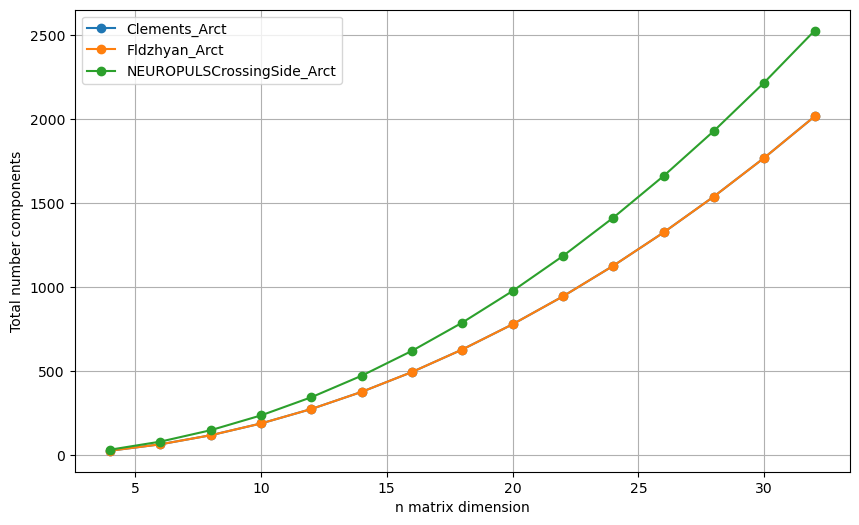

In [52]:
# Create the grapth
import matplotlib.pyplot as plt

name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    filtered_df = df[df['name'] == arct]
    ns = filtered_df['n'].tolist()
    n_tot = filtered_df['n_tot'].tolist()
    plt.plot(ns, n_tot, marker='o', label=arct)
plt.xlabel('n matrix dimension')
plt.ylabel('Total number components')
plt.legend()
plt.grid(True)
plt.show()

## Number of Phase shifters

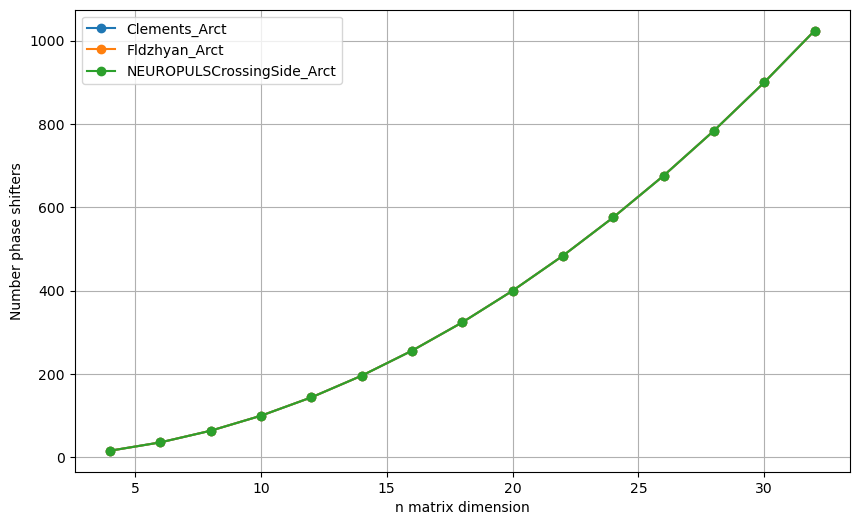

In [53]:
# Create the grapth
import matplotlib.pyplot as plt

name_models_choise = [
    'Clements_Arct', 
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    filtered_df = df[df['name'] == arct]
    ns = filtered_df['n'].tolist()
    n_tot = filtered_df['n_ht'].tolist()
    plt.plot(ns, n_tot, marker='o', label=arct)
plt.xlabel('n matrix dimension')
plt.ylabel('Number phase shifters')
plt.legend()
plt.grid(True)
plt.show()

# Grapths Power losses

## Sweep IMB
IL=-0.5dB \
CT=-30dB

In [54]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240801_run_1_imb_losses/'
name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]


def filter_list_of_dicts(dict_list, IL, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL and list(dictionary.values())[3] == CT:
            filtered_list.append(dictionary)
    return filtered_list


plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    file_JSON = "20240801_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL=-0.5, CT=-30.0)
    imbalances = [sim["imbalance_const"] for sim in filtered_list_disct]
    average = [sim["loss_average_dB"] for sim in filtered_list_disct]
    std_dev = [sim["loss_std_dev_dB"] for sim in filtered_list_disct]
    plt.errorbar(imbalances, average, yerr=std_dev,
                 marker='o', label=arct, capsize=5)
plt.xlabel('Imbalanced [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'organized_data/20240801_run_1_imb_losses/20240801_powers_Clements_Arct_N8.json'

<Figure size 1000x600 with 0 Axes>

## Sweep PhaseChangers insertion loss
IL=-0.5dB \
IMB=-0.5dB \
CT=-30dB

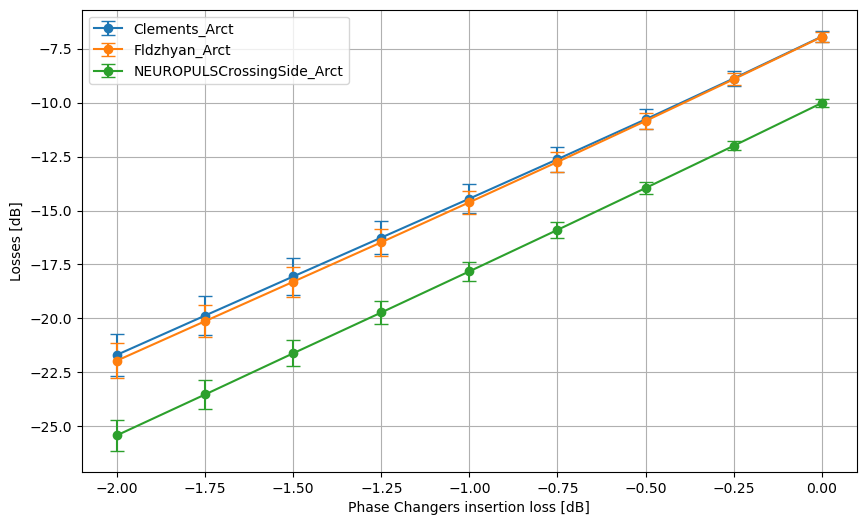

In [64]:
# Create the grapth
import json
import matplotlib.pyplot as plt

JSON_folder_name = 'organized_data/20240801_run_2_PCiloss_losses/'
name_models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

def filter_list_of_dicts(dict_list, IL, IMB, CT):
    filtered_list = []
    for dictionary in dict_list:
        if list(dictionary.values())[1] == IL and list(dictionary.values())[2] == IMB and list(dictionary.values())[3] == CT:
            filtered_list.append(dictionary)
    return filtered_list

plt.figure(figsize=(10, 6))
# Download the file
for arct in name_models_choise:
    file_JSON = "20240801_powers_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    filtered_list_disct = filter_list_of_dicts(dict_list=simulations, IL=-0.5, IMB=-0.5, CT=-30.0)
    PC_i_loss = [sim["PC_i_loss_const"] for sim in filtered_list_disct]
    average = [sim["loss_average_dB"] for sim in filtered_list_disct]
    std_dev = [sim["loss_std_dev_dB"] for sim in filtered_list_disct]
    plt.errorbar(PC_i_loss, average, yerr=std_dev,
                 marker='o', label=arct, capsize=5)
plt.xlabel('Phase Changers insertion loss [dB]')
plt.ylabel('Losses [dB]')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
# Define the matrix
matrix = np.array([[1, 1, 0, 0],
                   [2, 1, 0, 0],
                   [0, 0, 1, 1],
                   [0, 0, 2, -1]])

# Calculate the determinant
determinant_new_4 = np.linalg.det(matrix)

# Check if the determinant is non-zero and if so, calculate the inverse
if determinant_new_4 != 0:
    inverse_matrix_new_4 = np.linalg.inv(matrix)
else:
    inverse_matrix_new_4 = None

determinant_new_4, inverse_matrix_new_4

(2.9999999999999996,
 array([[-1.        ,  1.        ,  0.        ,  0.        ],
        [ 2.        , -1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33333333,  0.33333333],
        [ 0.        ,  0.        ,  0.66666667, -0.33333333]]))